In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import datetime
# import os

# try:
#     n3 = 'numbers3.csv'
#     n4 = 'numbers4.csv'
#     t3 = os.path.getmtime(n3)
#     t4 = os.path.getmtime(n4)
#     d3 = int(datetime.datetime.fromtimestamp(t3))[:10]
#     d4 = int(datetime.datetime.fromtimestamp(t4))[:10]
#     today = int(datetime.datetime.now())[:10]
#     if d3 != today or d4 != today:
#         print('File already exists.')
#     else:
#         print('Start scraping.')
#         %run crawlers.py
#         print('End scraping.')
# except:
#     print('Start scraping.')
#     %run crawlers.py
#     print('End scraping.')

%run crawlers.py

In [3]:
numbers3 = pd.read_csv('lotto3.csv', dtype=object)
numbers4 = pd.read_csv('lotto4.csv', dtype=object)

In [4]:
numbers3.tail()

,index,num,num1,num2,num3
5505,5506,317,3,1,7
5506,5507,226,2,2,6
5507,5508,687,6,8,7
5508,5509,267,2,6,7
5509,5510,930,9,3,0


In [5]:
numbers4.tail()

,index,num,num1,num2,num3,num4
5505,5506,7738,7,7,3,8
5506,5507,8063,8,0,6,3
5507,5508,8876,8,8,7,6
5508,5509,8499,8,4,9,9
5509,5510,5989,5,9,8,9


In [6]:
numbers4_1 = numbers4.num1.value_counts()
numbers4_2 = numbers4.num2.value_counts()
numbers4_3 = numbers4.num3.value_counts()
numbers4_4 = numbers4.num4.value_counts()

numbers3_1 = numbers3.num1.value_counts()
numbers3_2 = numbers3.num2.value_counts()
numbers3_3 = numbers3.num3.value_counts()

counter4_all = pd.concat([numbers4_1, numbers4_2, numbers4_3, numbers4_4], axis=1).sort_index()
counter3_all = pd.concat([numbers3_1, numbers3_2, numbers3_3], axis=1).sort_index()

In [7]:
counter3_all

,num1,num2,num3
0,529,583,529
1,554,550,552
2,561,546,576
3,562,577,539
4,542,541,539
5,499,532,536
6,572,533,526
7,533,553,566
8,577,527,577
9,581,568,570


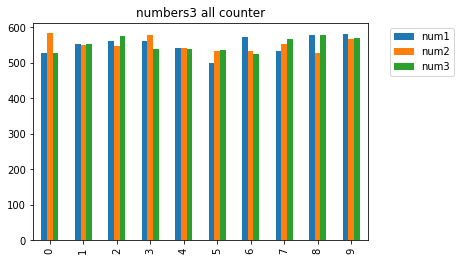

In [8]:
counter3_all.plot.bar()
plt.title('numbers3 all counter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [9]:
counter4_all

,num1,num2,num3,num4
0,551,559,585,548
1,503,549,543,597
2,548,453,511,547
3,549,578,556,524
4,555,534,540,537
5,529,583,556,554
6,588,528,515,544
7,565,568,563,529
8,565,559,558,527
9,557,599,583,603


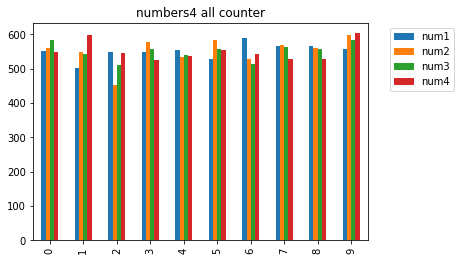

In [10]:
counter4_all.plot.bar()
plt.title('numbers4 all counter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [11]:
"""
    [0]: index
    [1]: index
    [2]: num
    [3]: num1
    [4]: num2
    [5]: num3
"""
num3_dup = [0]*10
for row in numbers3.itertuples():
    if row[3] == row[4]:
        num3_dup[int(row[3])] += 1
    elif row[4] == row[5]:
        num3_dup[int(row[4])] += 1
    elif row[3] == row[5]:
        num3_dup[int(row[3])] += 1
    else:
        pass

In [12]:
num4_2dup = [0]*10
for row in numbers4.itertuples():
    if row[3] == row[4]:
        num4_2dup[int(row[3])] += 1
    elif row[3] == row[5]:
        num4_2dup[int(row[3])] += 1
    elif row[3] == row[6]:
        num4_2dup[int(row[3])] += 1
    elif row[4] == row[5]:
        num4_2dup[int(row[4])] += 1
    elif row[4] == row[6]:
        num4_2dup[int(row[4])] += 1
    elif row[5] == row[6]:
        num4_2dup[int(row[5])] += 1
    else:
        pass

In [13]:
num4_3dup = [0]*10
for row in numbers4.itertuples():
    if row[3] == row[4] == row[5]:
        num4_3dup[int(row[3])] += 1
    elif row[3] == row[4] == row[6]:
        num4_3dup[int(row[3])] += 1
    elif row[3] == row[5] == row[6]:
        num4_3dup[int(row[3])] += 1
    elif row[4] == row[5] == row[6]:
        num4_3dup[int(row[4])] += 1
    else:
        pass

In [14]:
num34 = [num3_dup, num4_2dup, num4_3dup]
num34_dup = pd.DataFrame(num34, index=['num3_dup', 'num4_2dup', 'num4_3dup']).T
num34_dup

,num3_dup,num4_2dup,num4_3dup
0,153,264,20
1,152,289,20
2,174,251,20
3,175,261,23
4,153,256,29
5,148,274,24
6,166,273,14
7,143,284,20
8,151,260,18
9,155,306,26


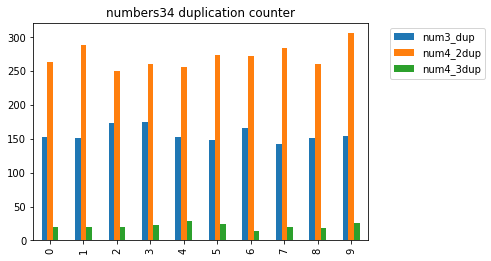

In [15]:
num34_dup.plot.bar()
plt.title('numbers34 duplication counter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [16]:
num3dup = pd.DataFrame(num3_dup, index=['0','1','2','3','4','5','6','7','8','9'], columns=['num3_dup'])
num3dup

,num3_dup
0,153
1,152
2,174
3,175
4,153
5,148
6,166
7,143
8,151
9,155


Text(0.5, 1.0, 'numbers3 duplication counter')

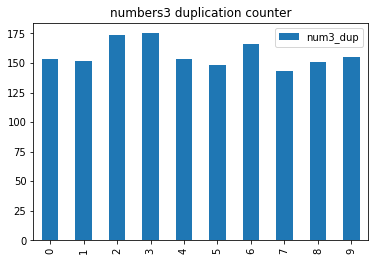

In [17]:
num3dup.plot.bar()
plt.title('numbers3 duplication counter')

In [18]:
num4dup2 = pd.DataFrame(num4_2dup, index=['0','1','2','3','4','5','6','7','8','9'], columns=['num4_2dup'])
num4dup2

,num4_2dup
0,264
1,289
2,251
3,261
4,256
5,274
6,273
7,284
8,260
9,306


Text(0.5, 1.0, 'numbers4 2_duplication counter')

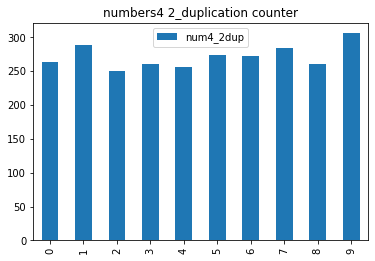

In [19]:
num4dup2.plot.bar()
plt.title('numbers4 2_duplication counter')

In [20]:
num4dup3 = pd.DataFrame(num4_3dup, index=['0','1','2','3','4','5','6','7','8','9'], columns=['num4_3dup'])
num4dup3

,num4_3dup
0,20
1,20
2,20
3,23
4,29
5,24
6,14
7,20
8,18
9,26


Text(0.5, 1.0, 'numbers4 3_duplication counter')

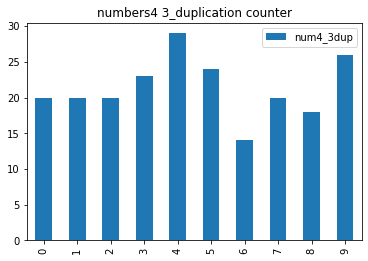

In [21]:
num4dup3.plot.bar()
plt.title('numbers4 3_duplication counter')

In [22]:
numbers4_1_100 = numbers4.tail(100).num1.value_counts()
numbers4_2_100 = numbers4.tail(100).num2.value_counts()
numbers4_3_100 = numbers4.tail(100).num3.value_counts()
numbers4_4_100 = numbers4.tail(100).num4.value_counts()

numbers3_1_100 = numbers3.tail(100).num1.value_counts()
numbers3_2_100 = numbers3.tail(100).num2.value_counts()
numbers3_3_100 = numbers3.tail(100).num3.value_counts()

numbers4_100 = pd.concat([numbers4_1_100, numbers4_2_100, numbers4_3_100, numbers4_4_100], axis=1).sort_index()
numbers3_100 = pd.concat([numbers3_1_100, numbers3_2_100, numbers3_3_100], axis=1).sort_index()

In [23]:
numbers4_100

,num1,num2,num3,num4
0,12,13,10,5
1,7,6,11,12
2,13,4,11,6
3,8,9,12,13
4,10,19,8,2
5,7,3,14,8
6,9,7,8,16
7,8,13,15,10
8,17,17,6,9
9,9,9,5,19


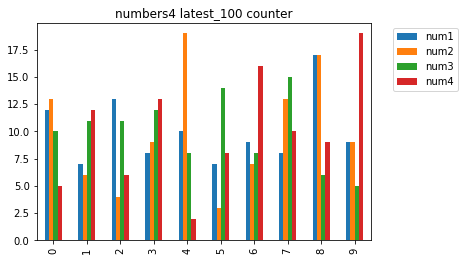

In [24]:
numbers4_100.plot.bar()
plt.title('numbers4 latest_100 counter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [25]:
numbers3_100

,num1,num2,num3
0,8,13,10
1,11,9,7
2,7,7,11
3,12,15,10
4,5,6,13
5,8,12,5
6,12,8,5
7,9,8,14
8,18,11,14
9,10,11,11


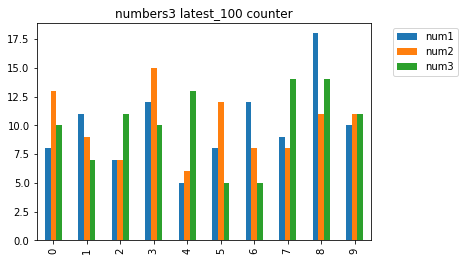

In [26]:
numbers3_100.plot.bar()
plt.title('numbers3 latest_100 counter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [27]:
numbers4_1_50 = numbers4.tail(50).num1.value_counts()
numbers4_2_50 = numbers4.tail(50).num2.value_counts()
numbers4_3_50 = numbers4.tail(50).num3.value_counts()
numbers4_4_50 = numbers4.tail(50).num4.value_counts()

numbers3_1_50 = numbers3.tail(50).num1.value_counts()
numbers3_2_50 = numbers3.tail(50).num2.value_counts()
numbers3_3_50 = numbers3.tail(50).num3.value_counts()

numbers4_50 = pd.concat([numbers4_1_50, numbers4_2_50, numbers4_3_50, numbers4_4_50], axis=1).sort_index()
numbers3_50 = pd.concat([numbers3_1_50, numbers3_2_50, numbers3_3_50], axis=1).sort_index()

In [28]:
numbers4_50

,num1,num2,num3,num4
0,5,6,6,3.0
1,3,3,5,6.0
2,7,2,5,NaN
3,2,8,6,9.0
4,4,8,3,1.0
5,3,2,9,4.0
6,7,5,4,9.0
7,3,5,7,4.0
8,10,5,3,6.0
9,6,6,2,8.0


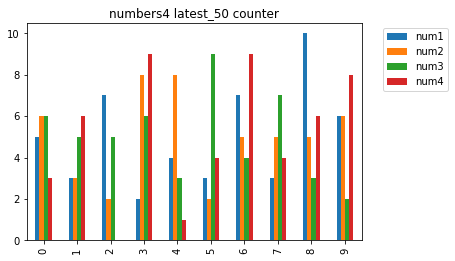

In [29]:
numbers4_50.plot.bar()
plt.title('numbers4 latest_50 counter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [30]:
numbers3_50

,num1,num2,num3
0,4,5,6
1,6,6,5
2,5,5,5
3,7,9,2
4,2,2,4
5,4,6,3
6,8,2,2
7,3,2,9
8,5,6,8
9,6,7,6


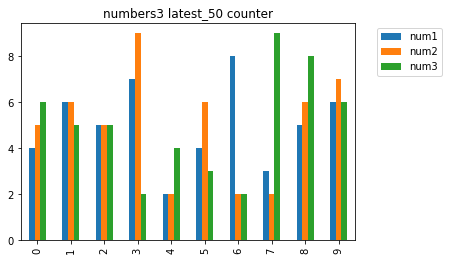

In [31]:
numbers3_50.plot.bar()
plt.title('numbers3 latest_50 counter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [32]:
c = len(numbers3)//50+1

n3 = [0]*c
n4 = [0]*c
for i in range(0, len(numbers3)//50+1):
    tmp = [0]*7
    tmp[0] = numbers4[i*50:(i+1)*50].num1.value_counts()
    tmp[1] = numbers4[i*50:(i+1)*50].num2.value_counts()
    tmp[2] = numbers4[i*50:(i+1)*50].num3.value_counts()
    tmp[3] = numbers4[i*50:(i+1)*50].num4.value_counts()

    tmp[4] = numbers3[i*50:(i+1)*50].num1.value_counts()
    tmp[5] = numbers3[i*50:(i+1)*50].num2.value_counts()
    tmp[6] = numbers3[i*50:(i+1)*50].num3.value_counts()

    n4[i] = pd.concat([tmp[0], tmp[1], tmp[2], tmp[3]], axis=1).sort_index().fillna(0)
    n3[i] = pd.concat([tmp[4], tmp[5], tmp[6]], axis=1).sort_index().fillna(0)

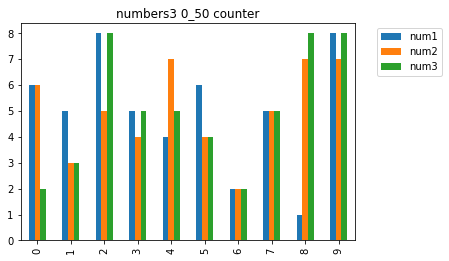

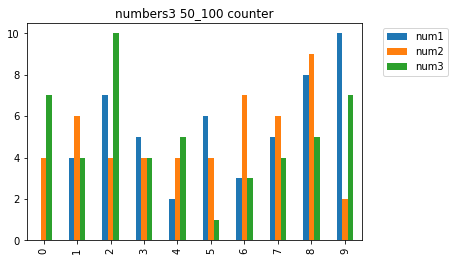

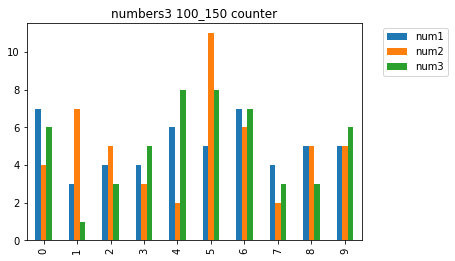

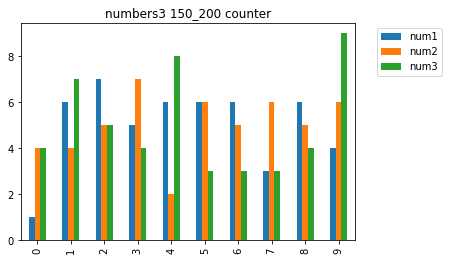

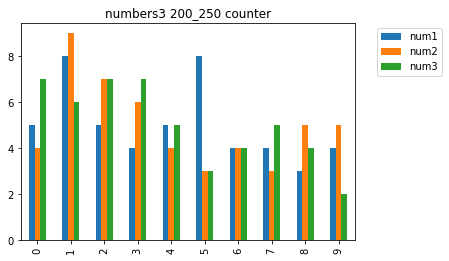

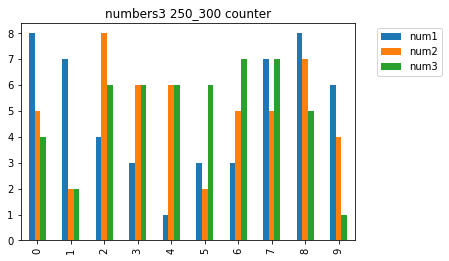

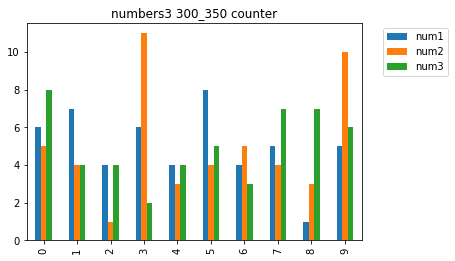

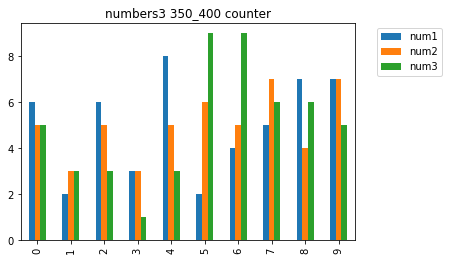

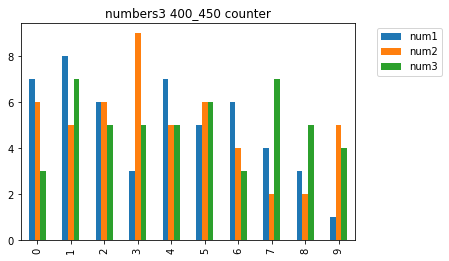

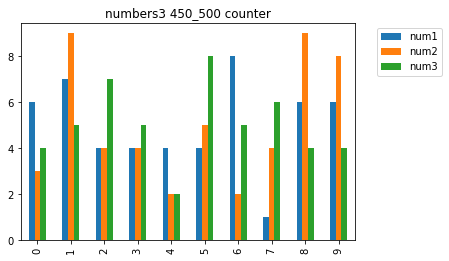

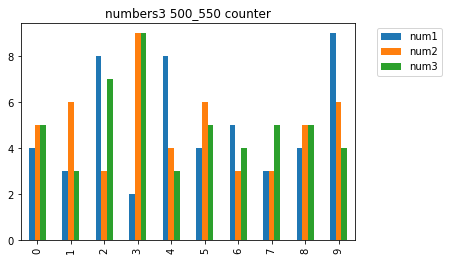

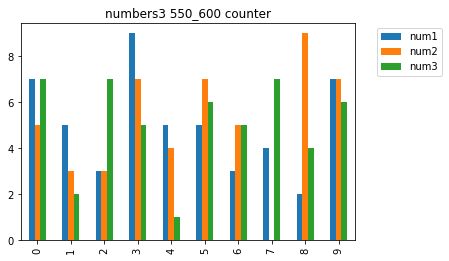

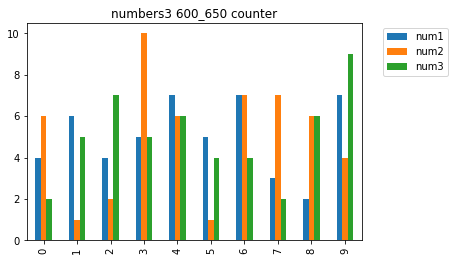

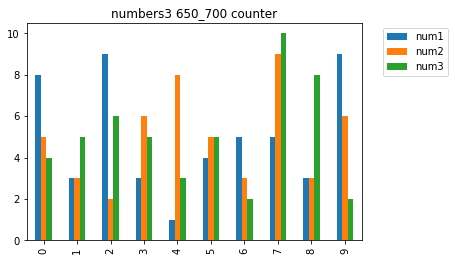

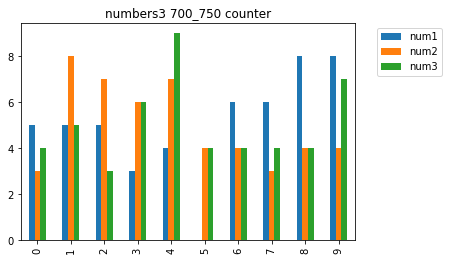

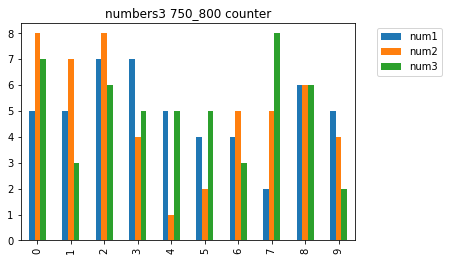

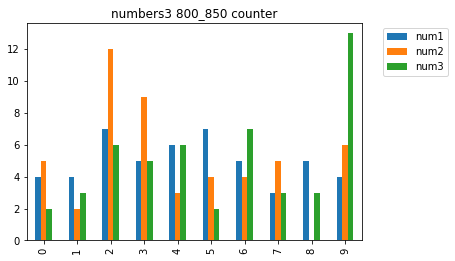

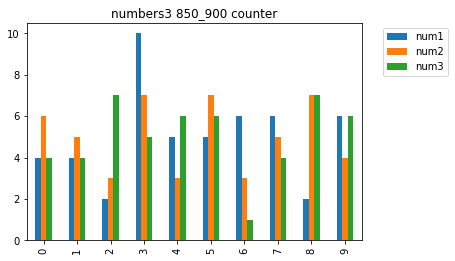

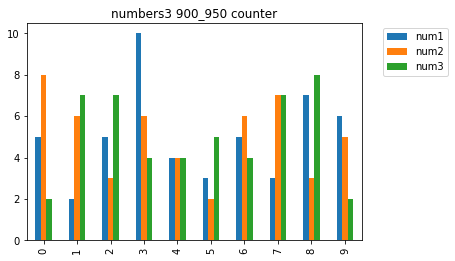

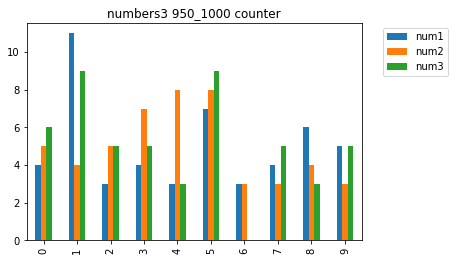

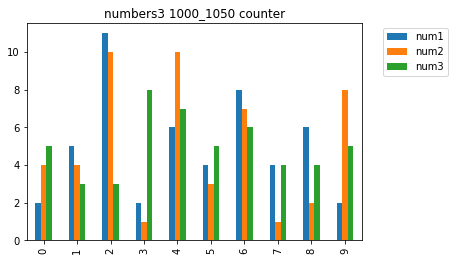

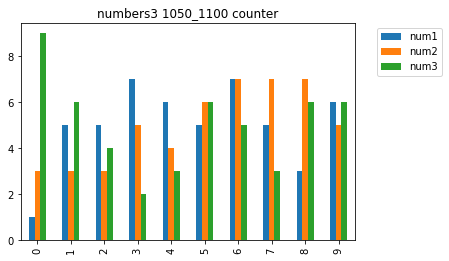

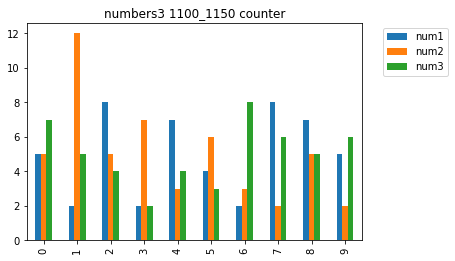

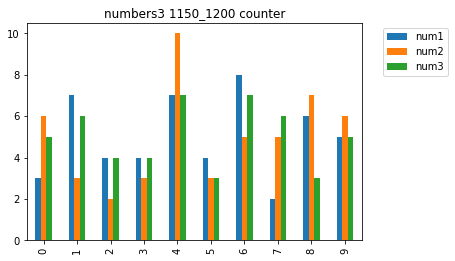

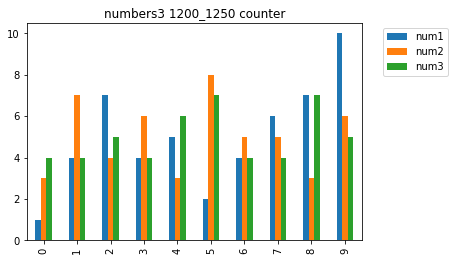

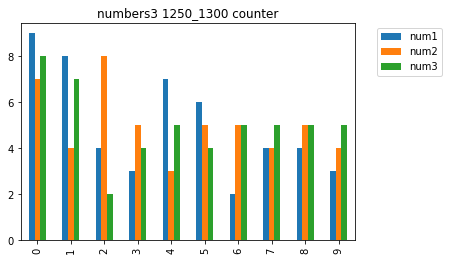

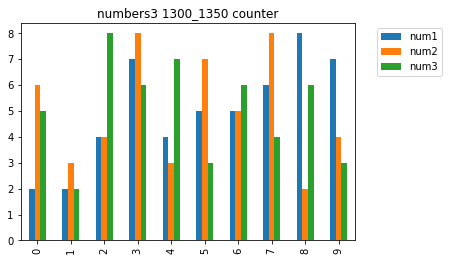

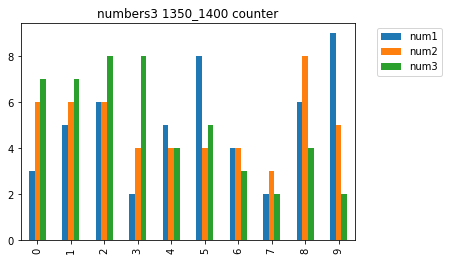

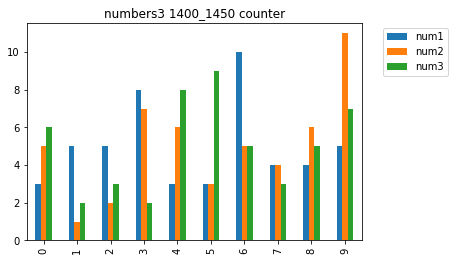

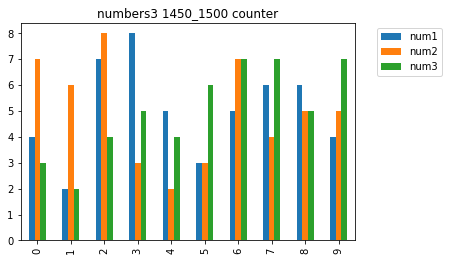

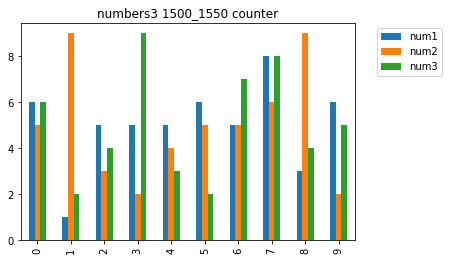

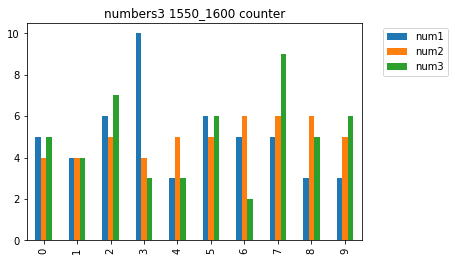

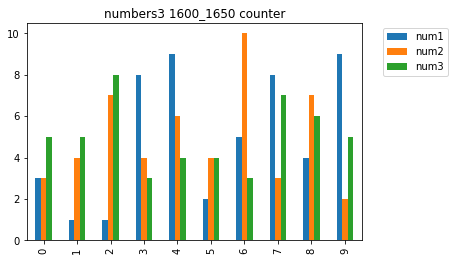

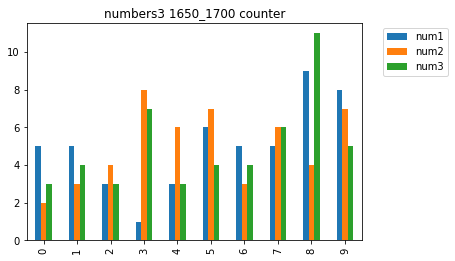

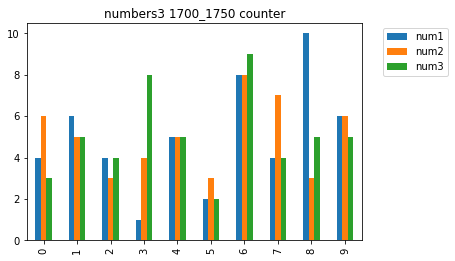

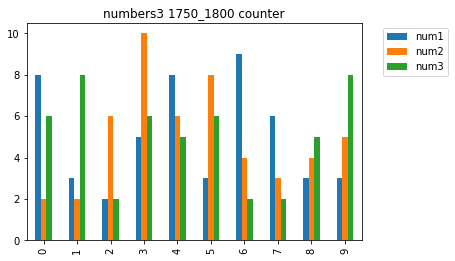

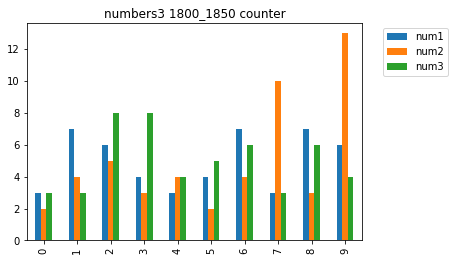

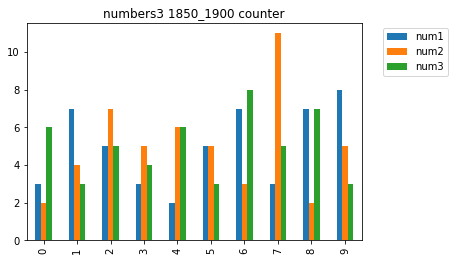

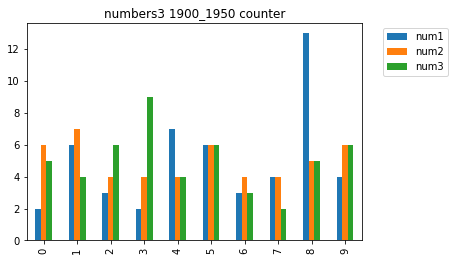

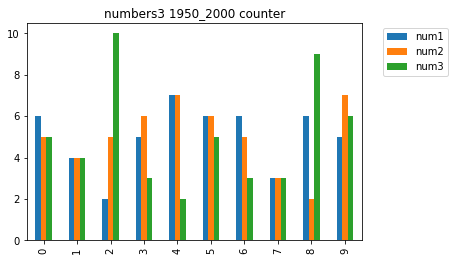

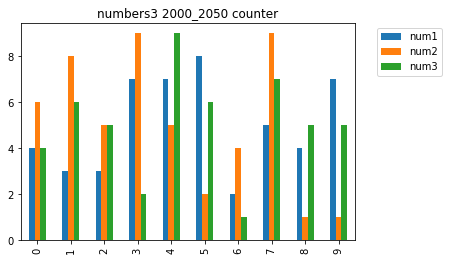

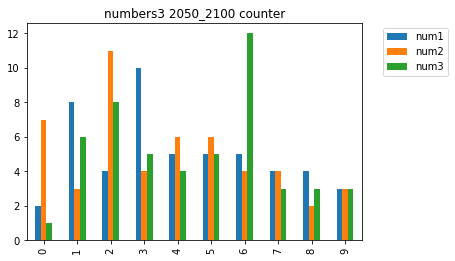

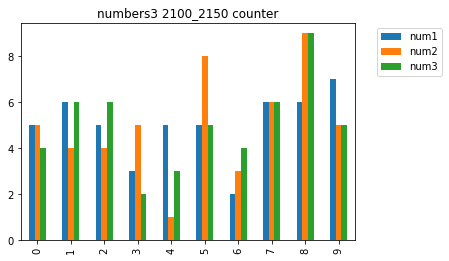

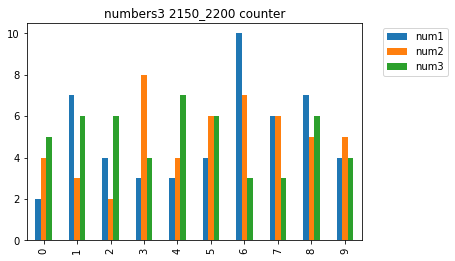

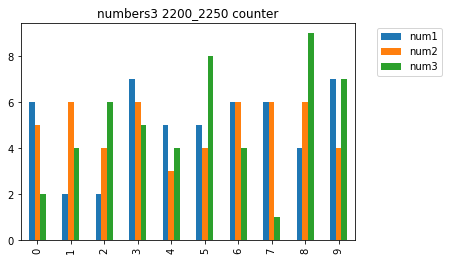

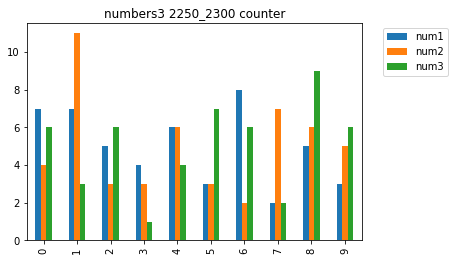

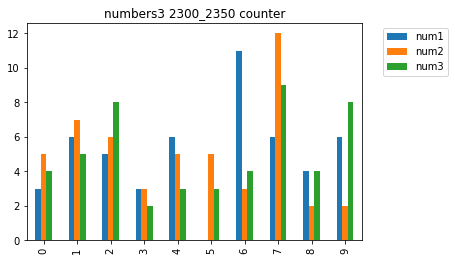

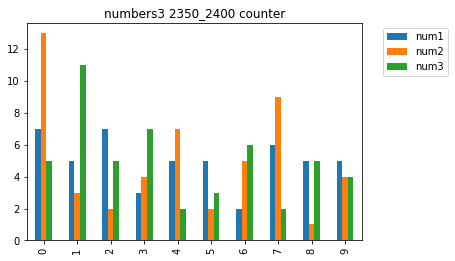

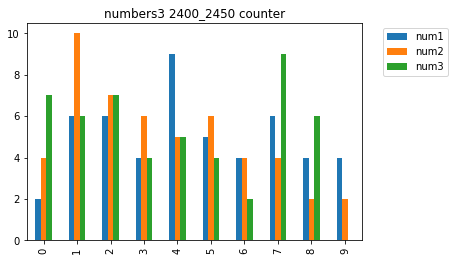

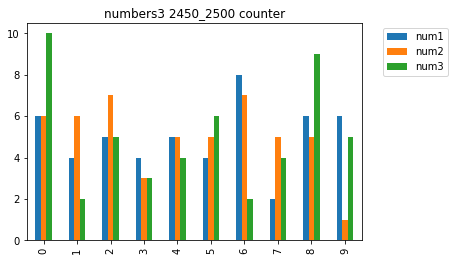

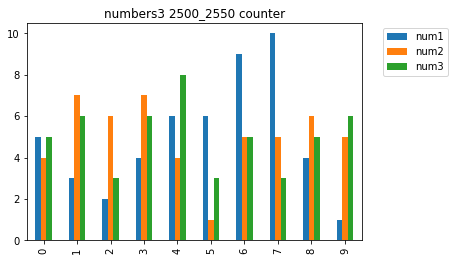

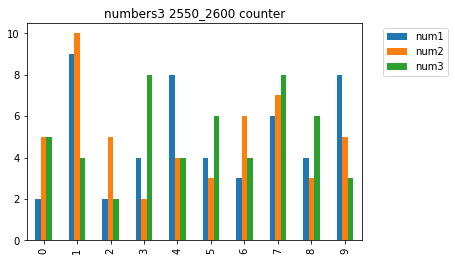

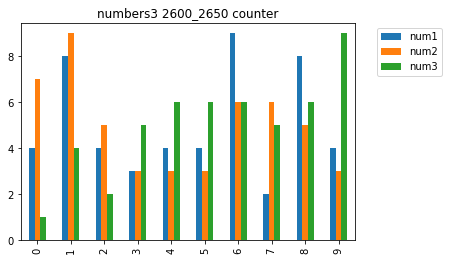

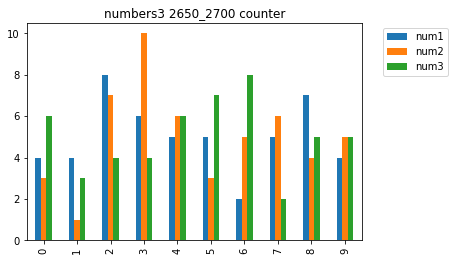

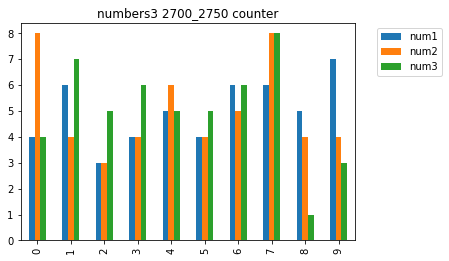

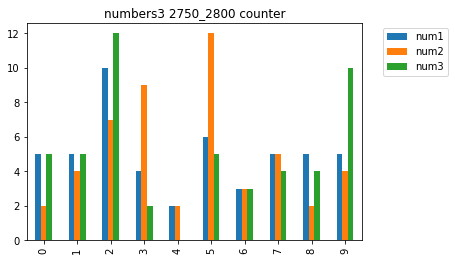

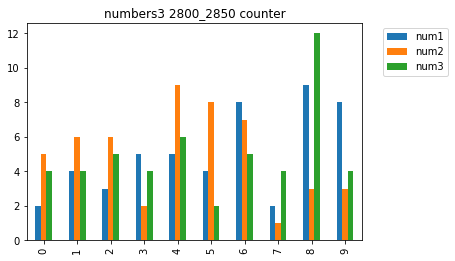

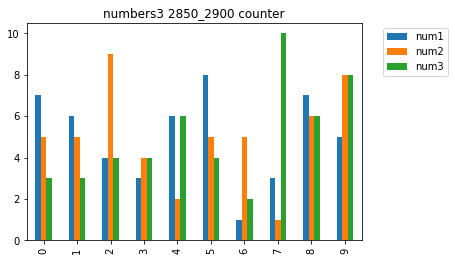

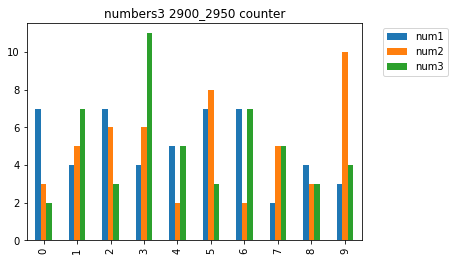

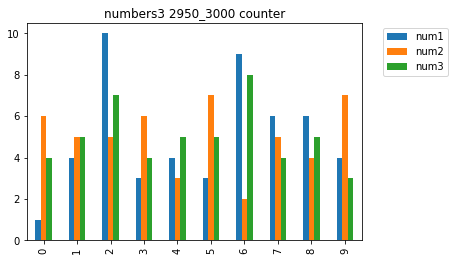

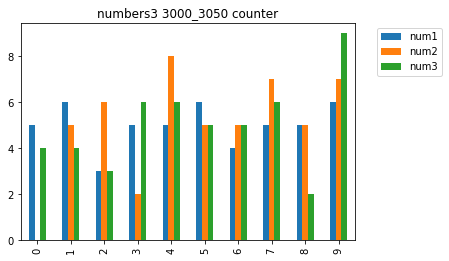

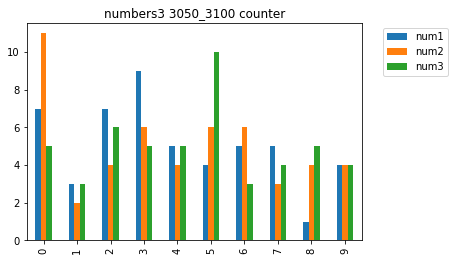

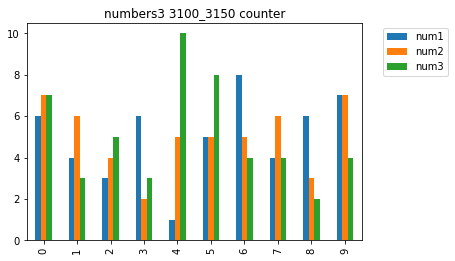

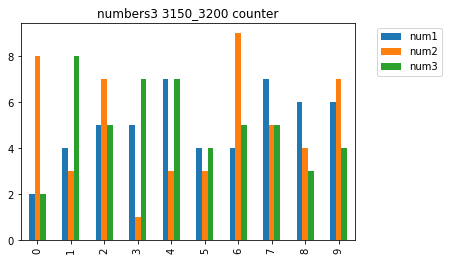

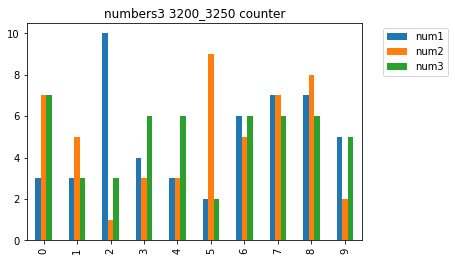

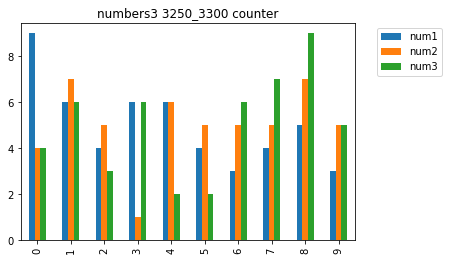

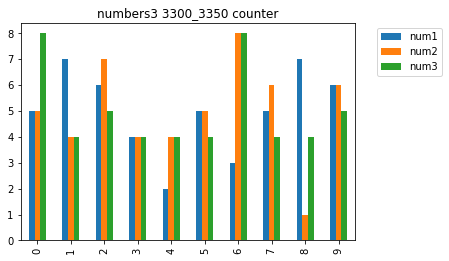

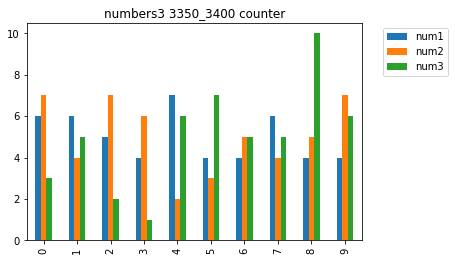

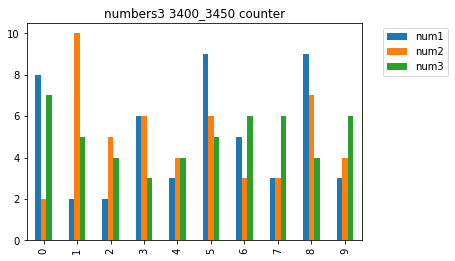

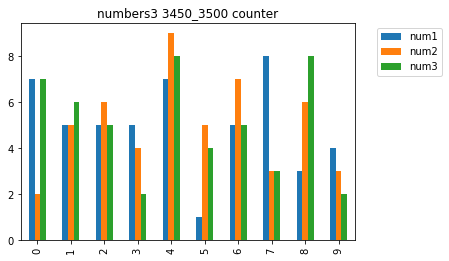

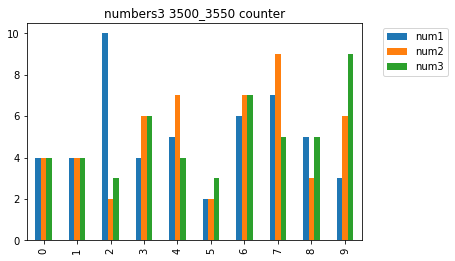

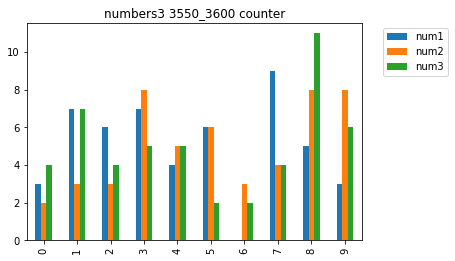

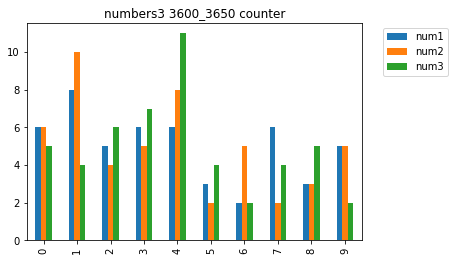

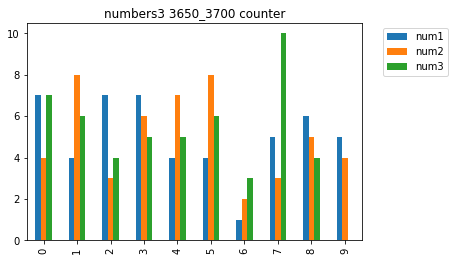

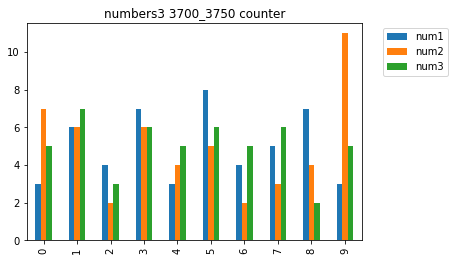

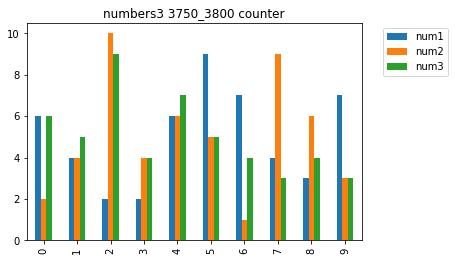

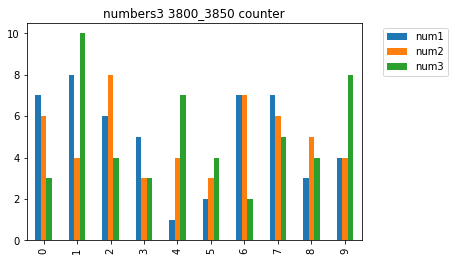

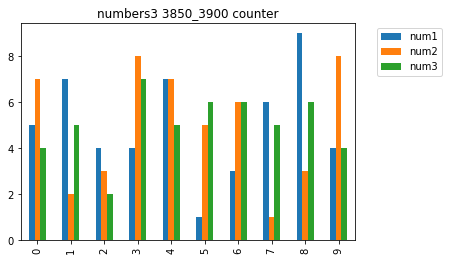

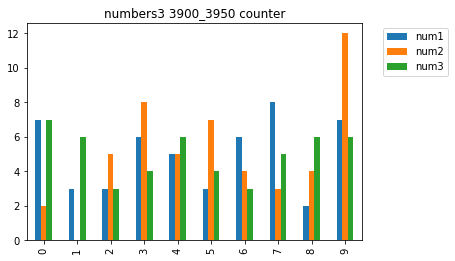

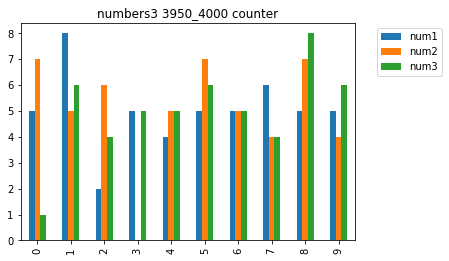

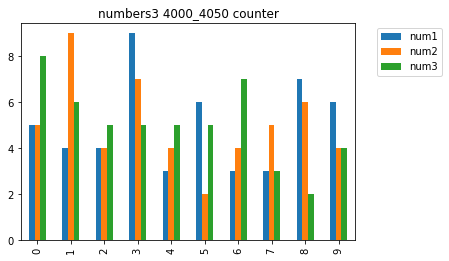

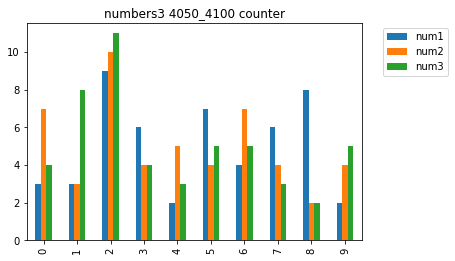

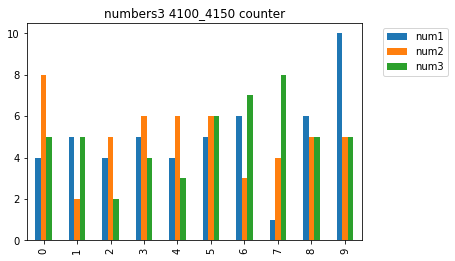

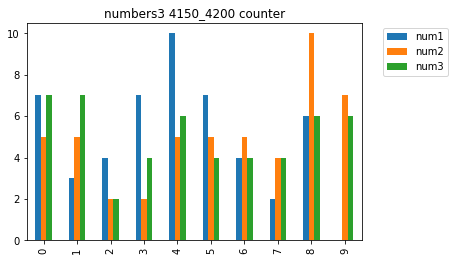

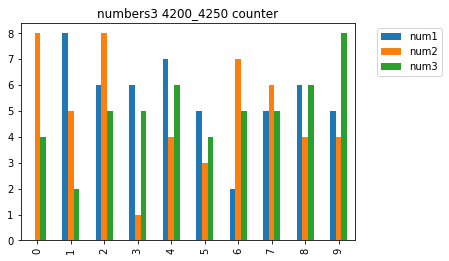

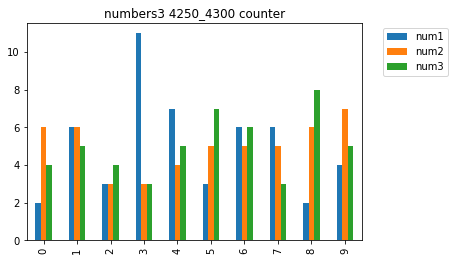

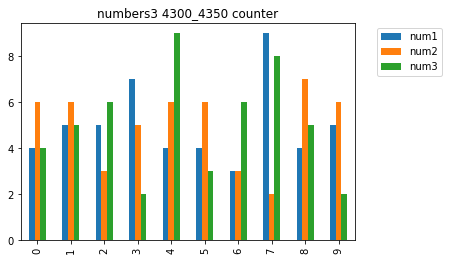

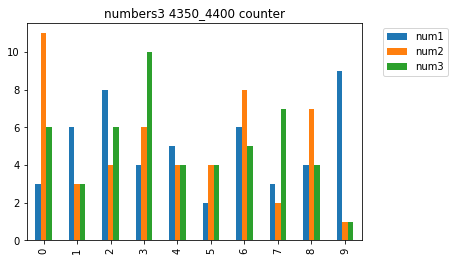

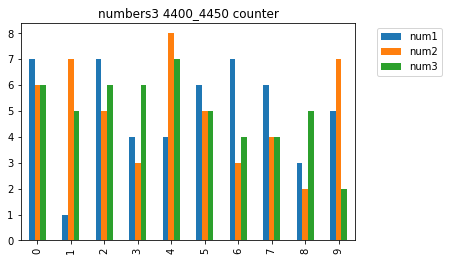

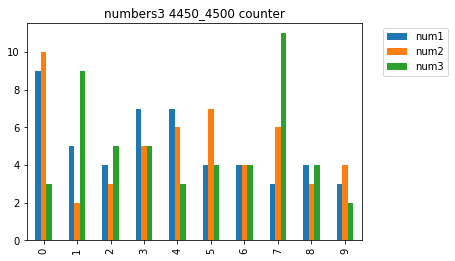

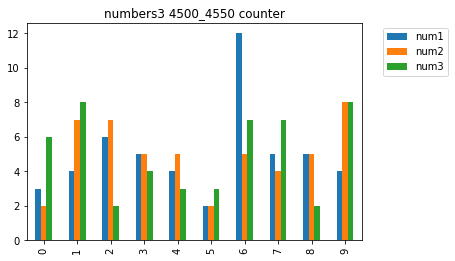

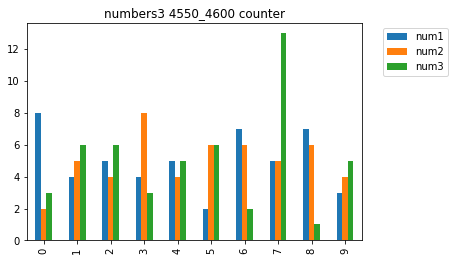

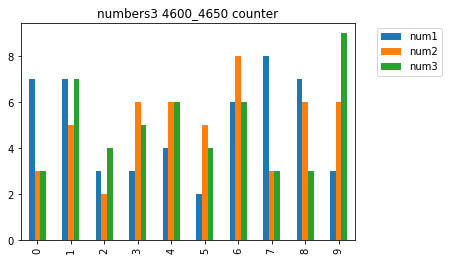

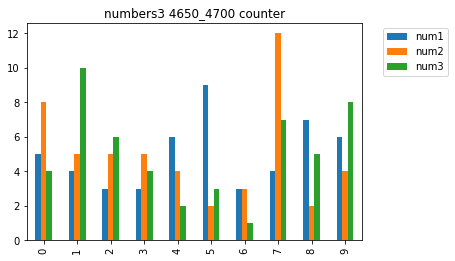

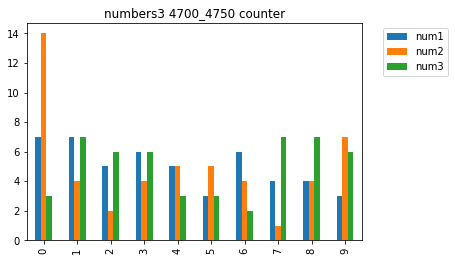

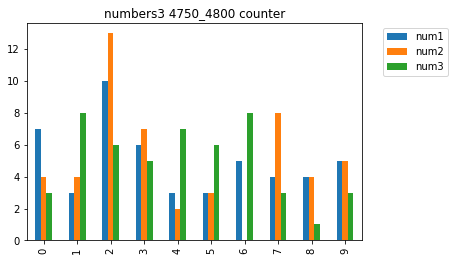

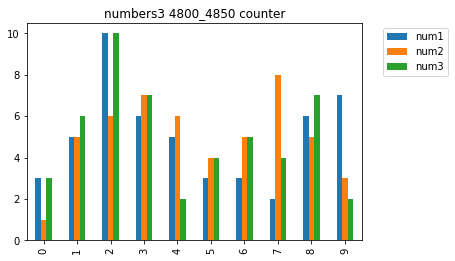

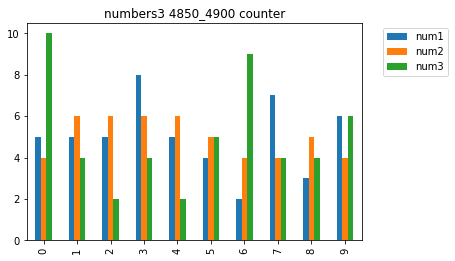

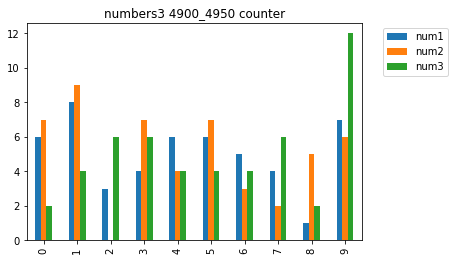

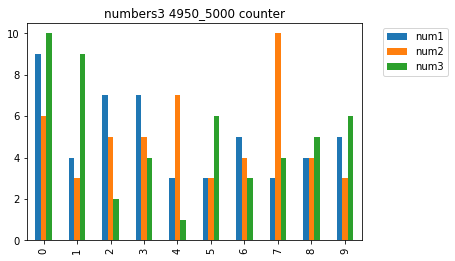

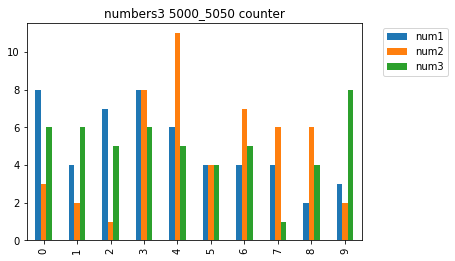

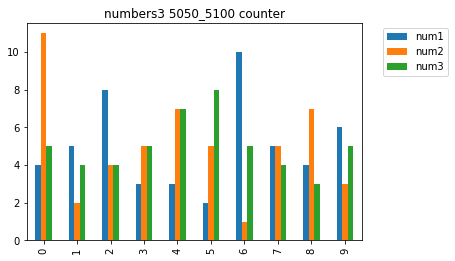

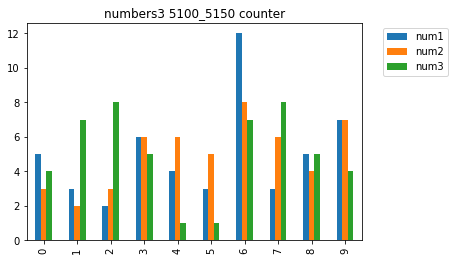

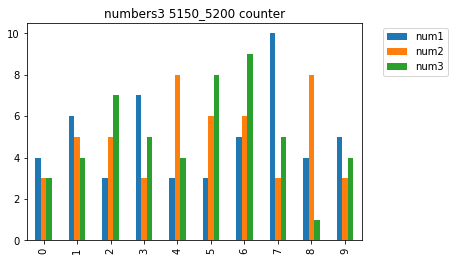

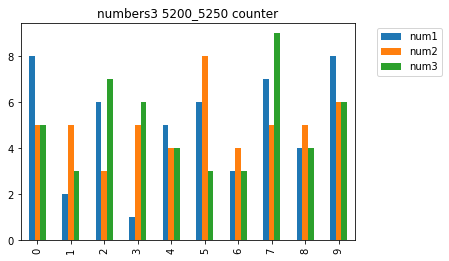

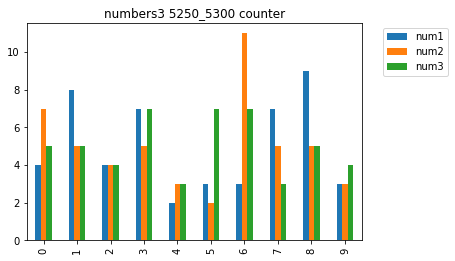

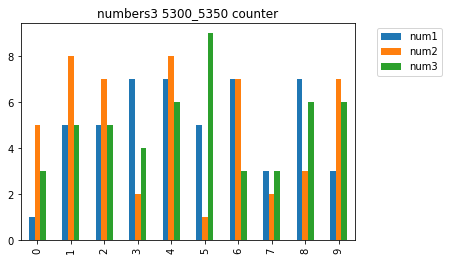

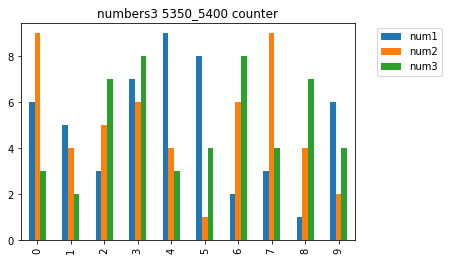

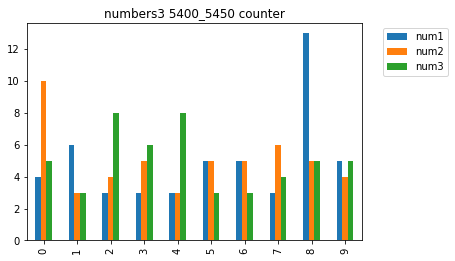

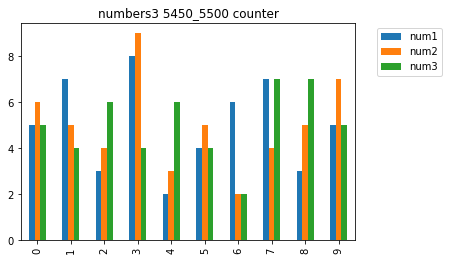

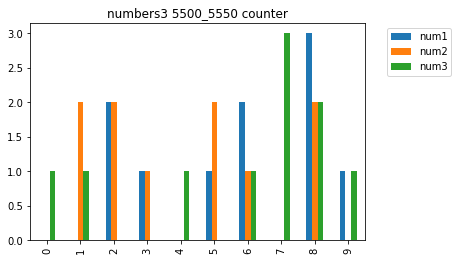

In [33]:
for i in range(len(n3)):
    n3[i].plot.bar()
    plt.title(f'numbers3 {i*50}_{(i+1)*50} counter')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

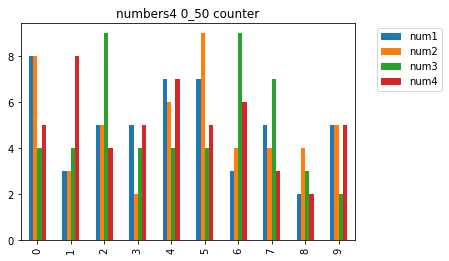

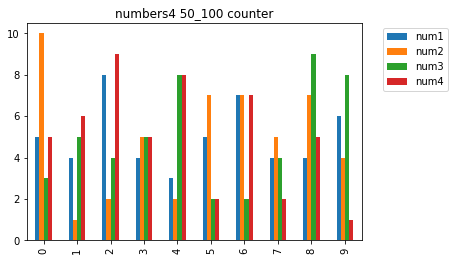

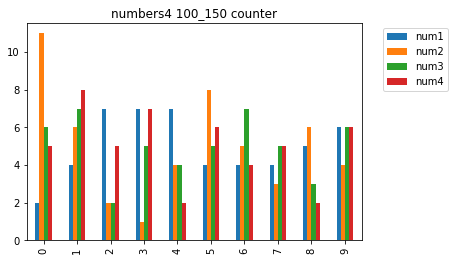

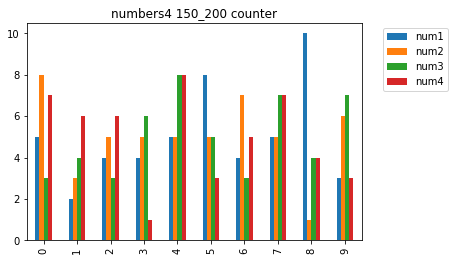

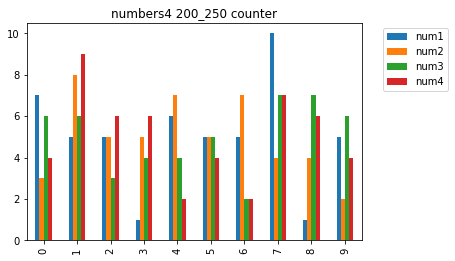

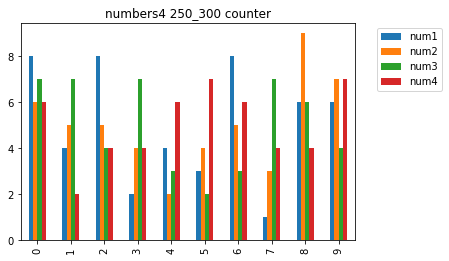

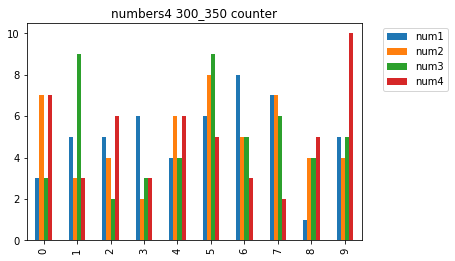

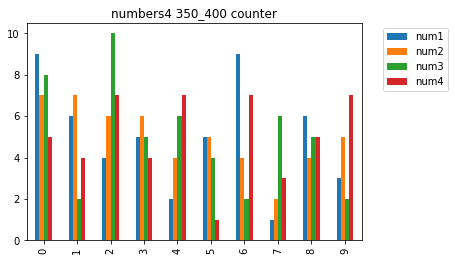

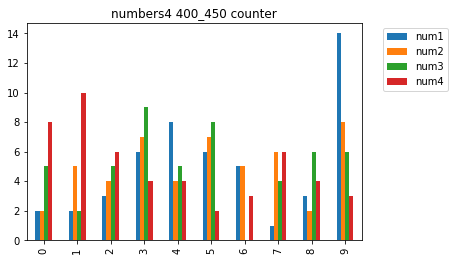

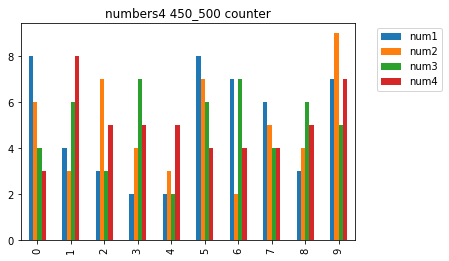

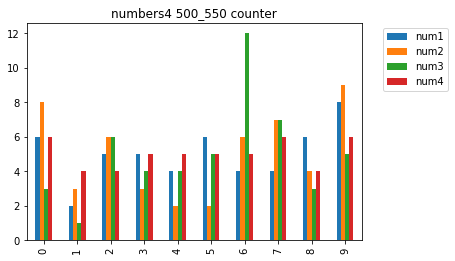

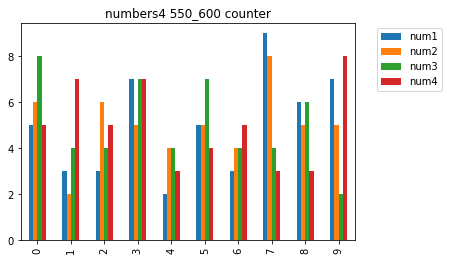

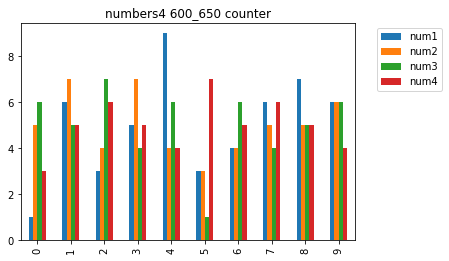

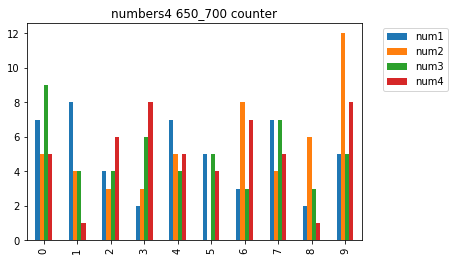

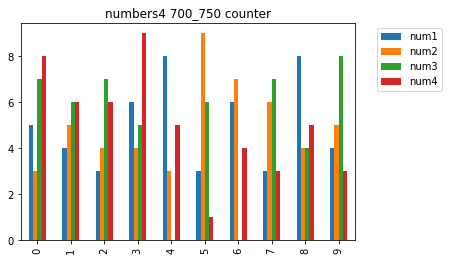

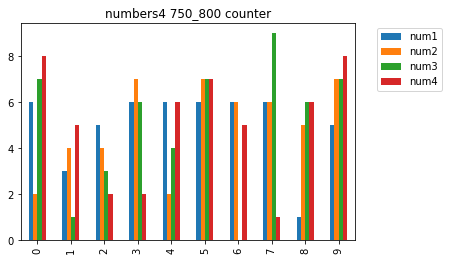

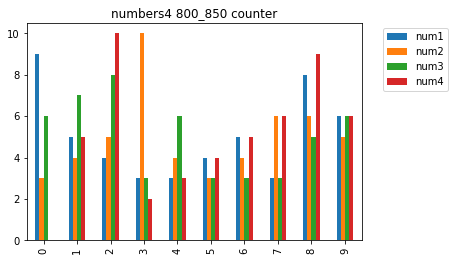

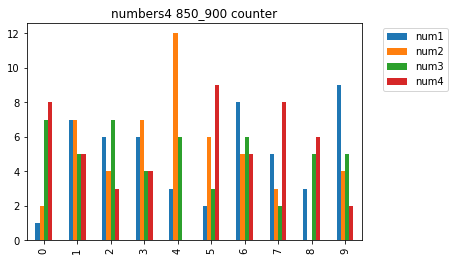

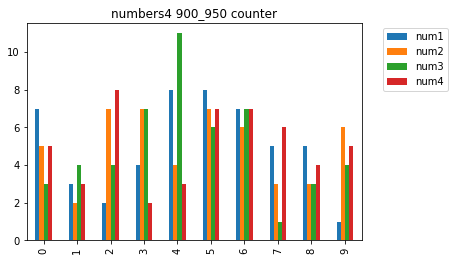

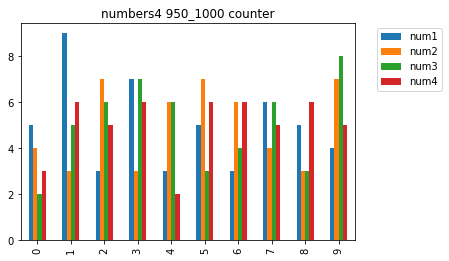

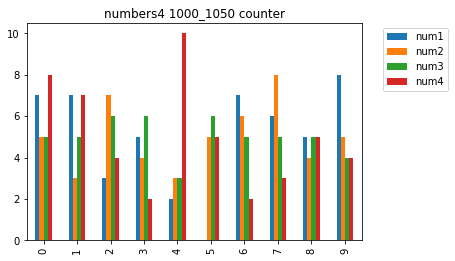

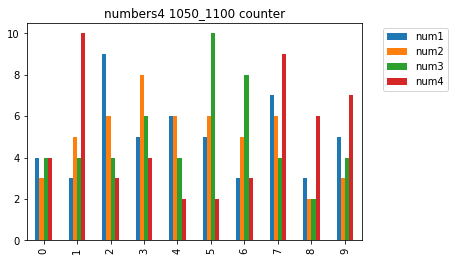

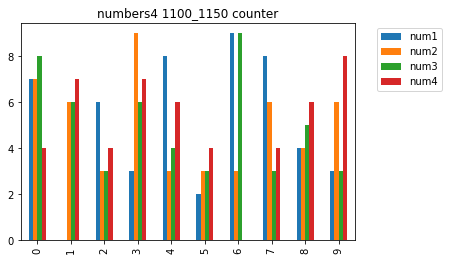

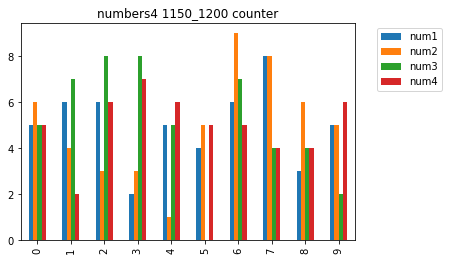

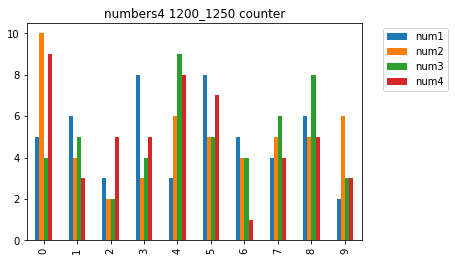

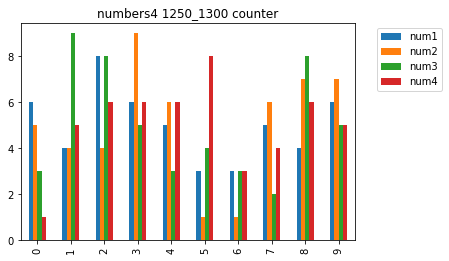

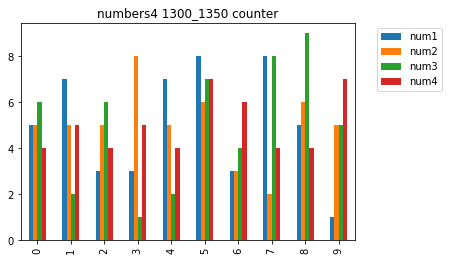

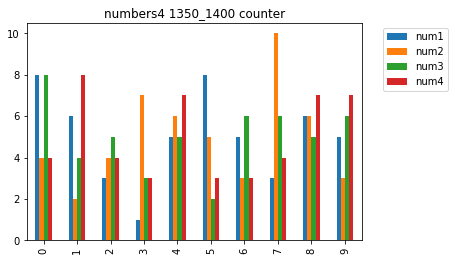

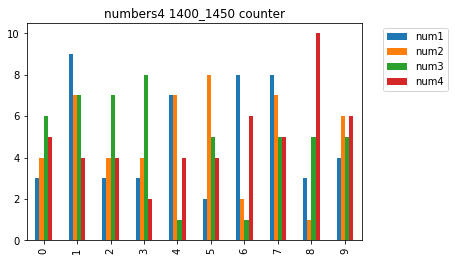

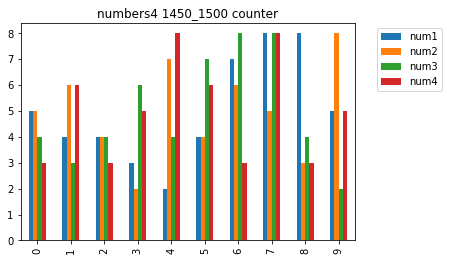

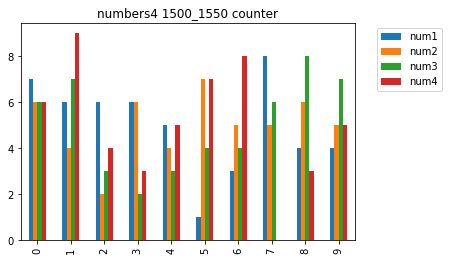

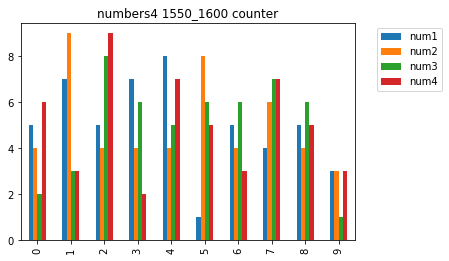

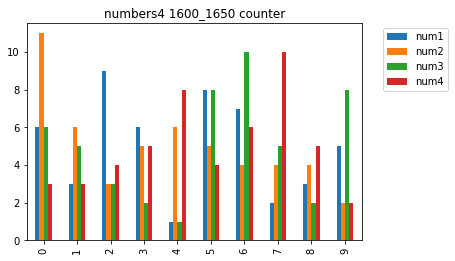

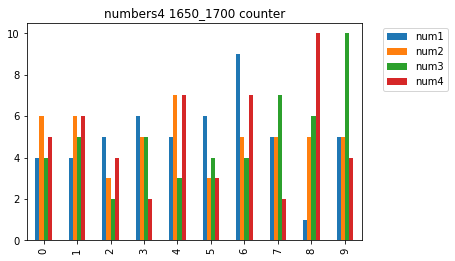

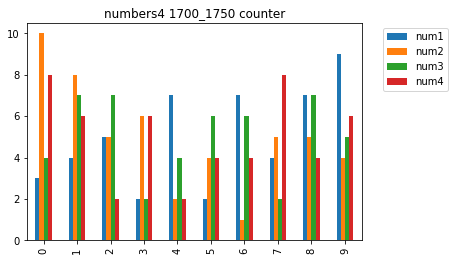

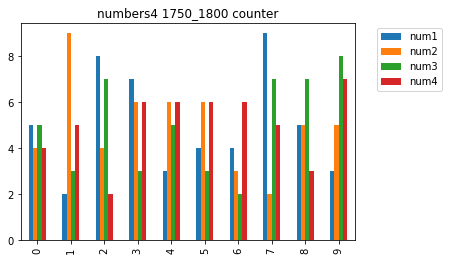

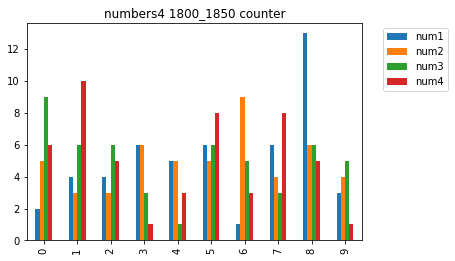

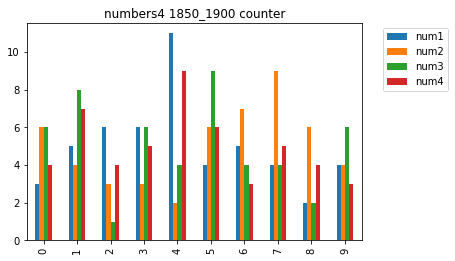

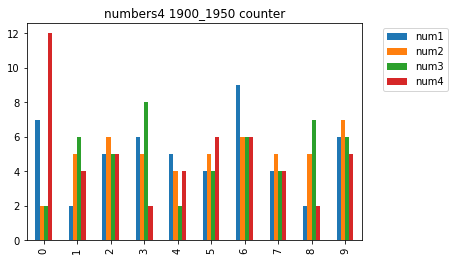

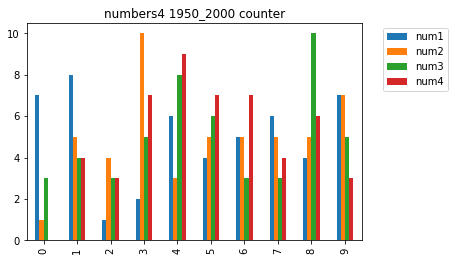

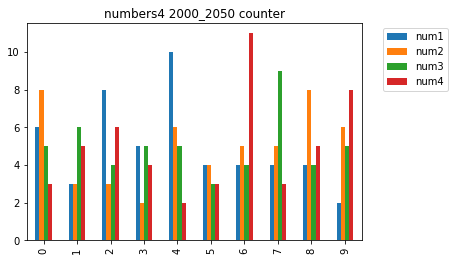

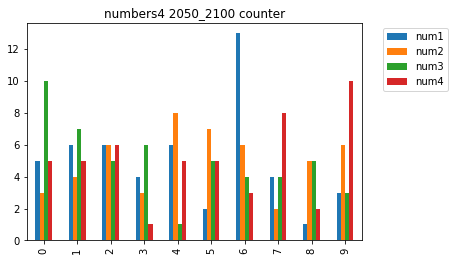

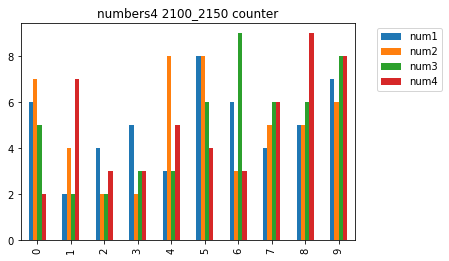

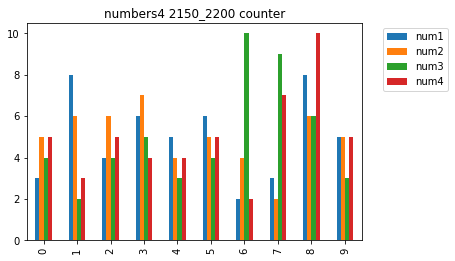

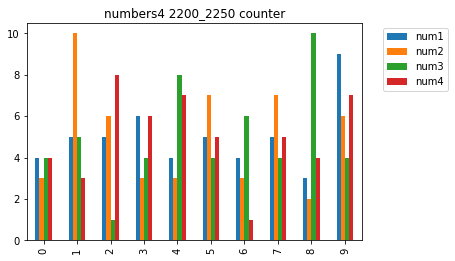

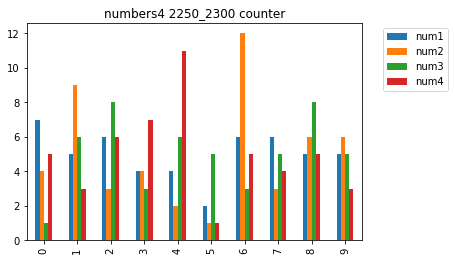

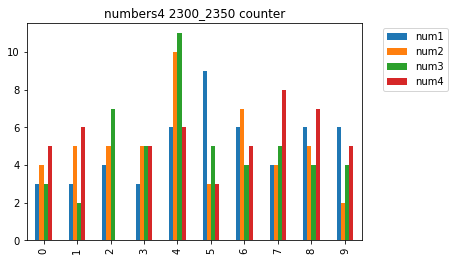

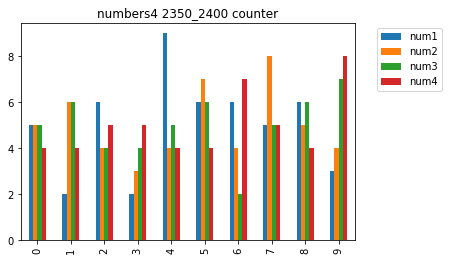

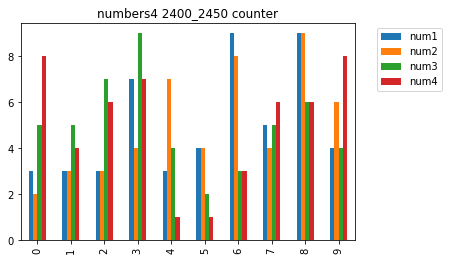

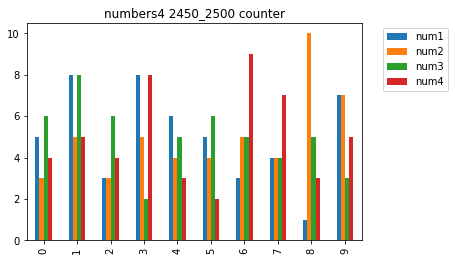

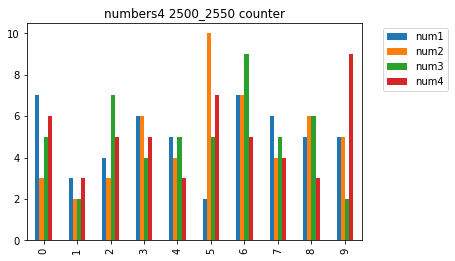

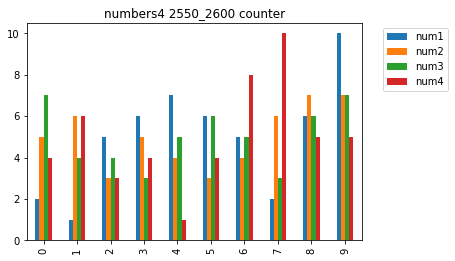

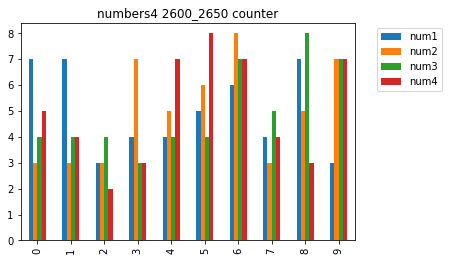

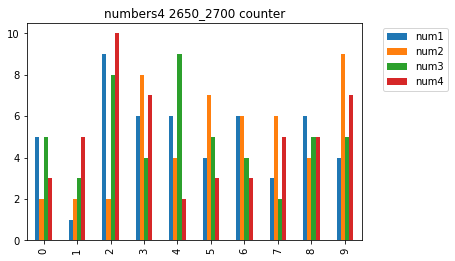

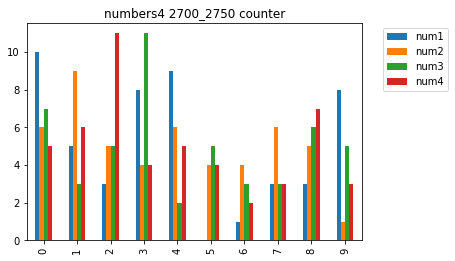

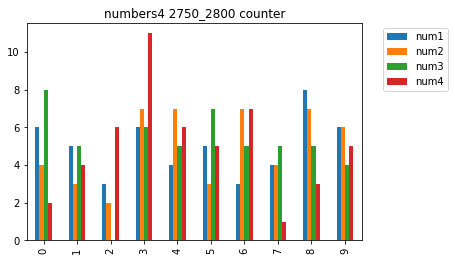

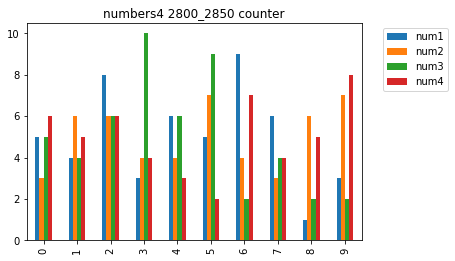

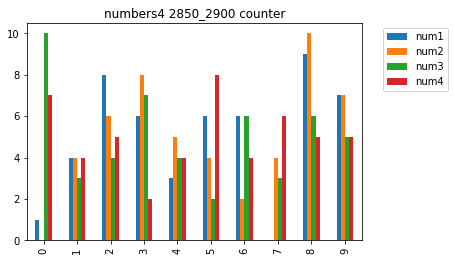

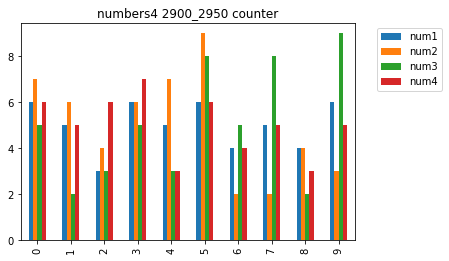

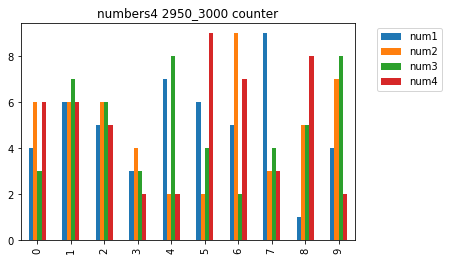

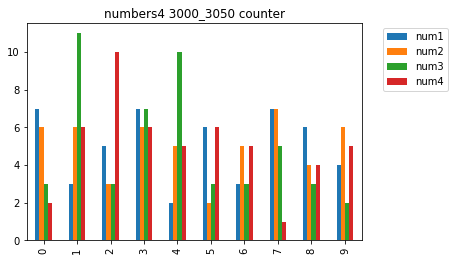

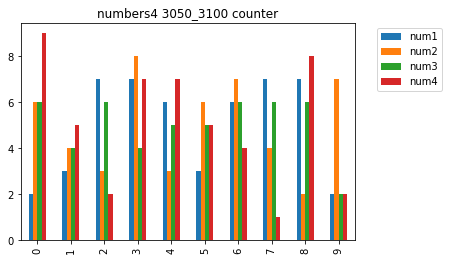

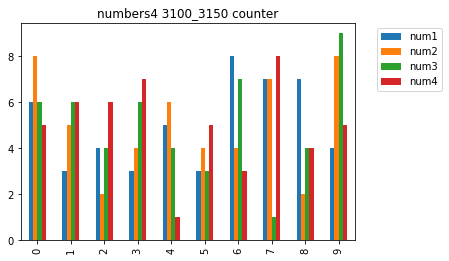

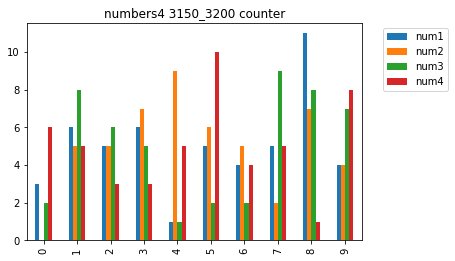

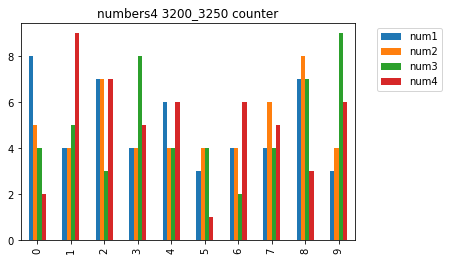

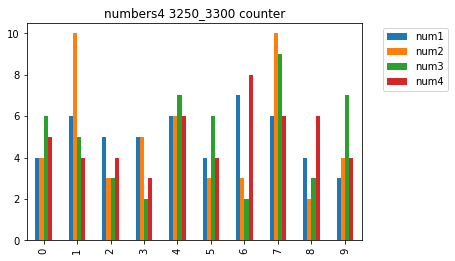

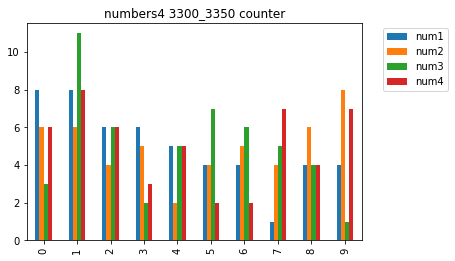

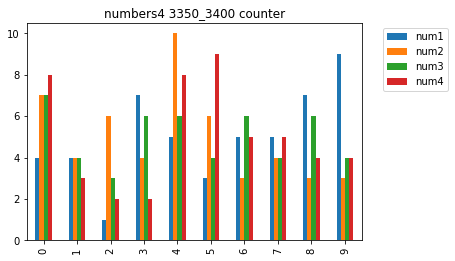

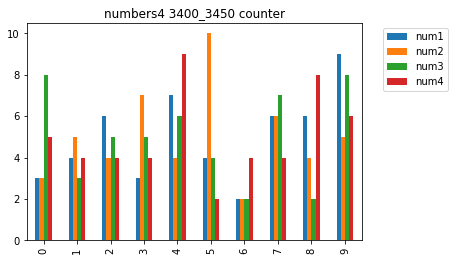

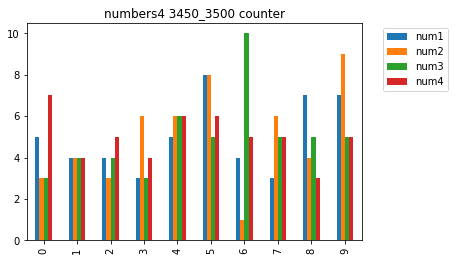

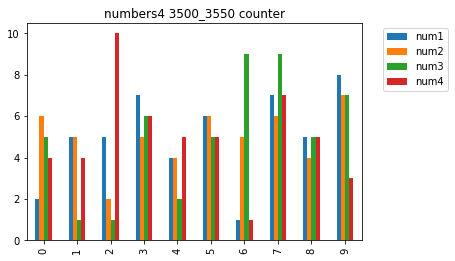

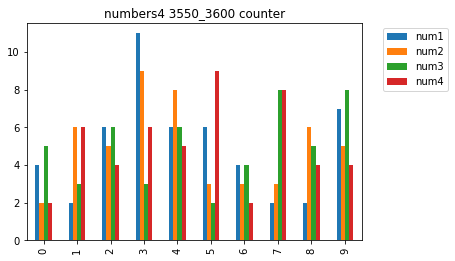

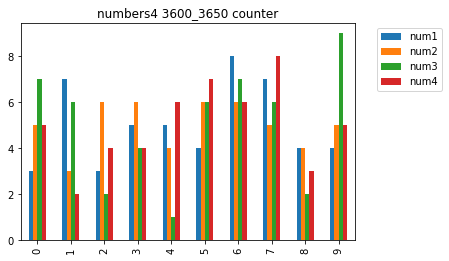

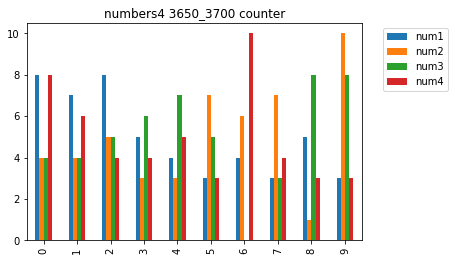

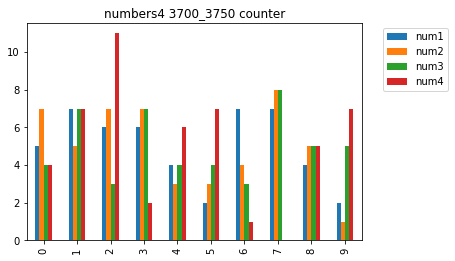

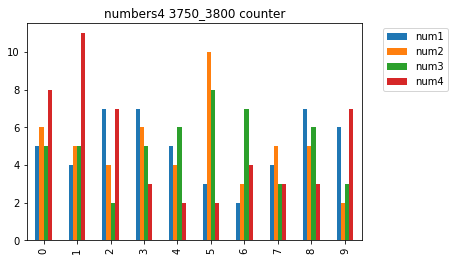

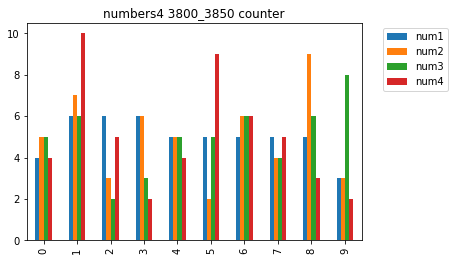

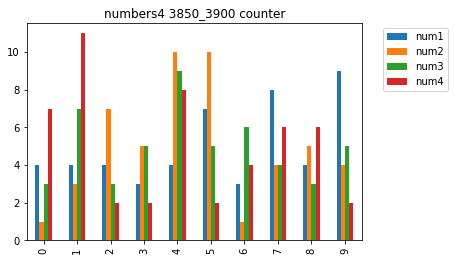

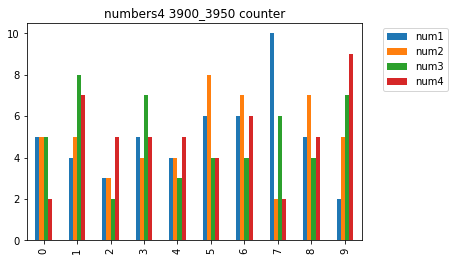

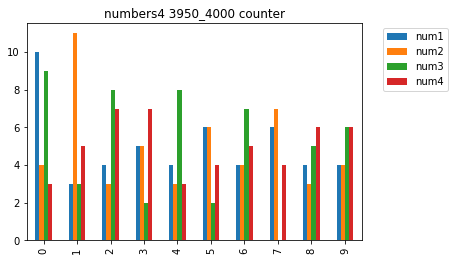

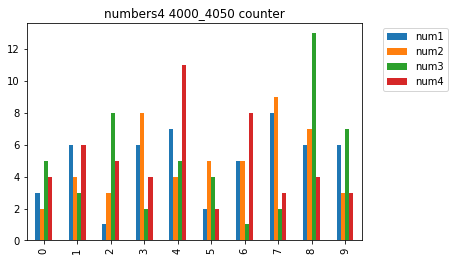

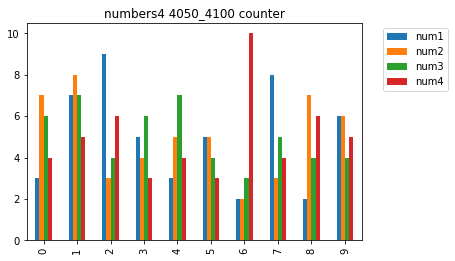

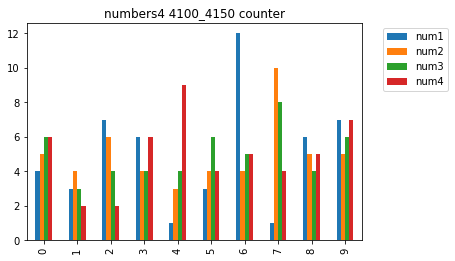

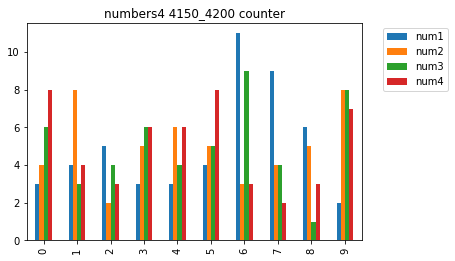

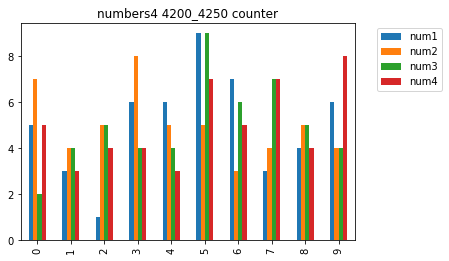

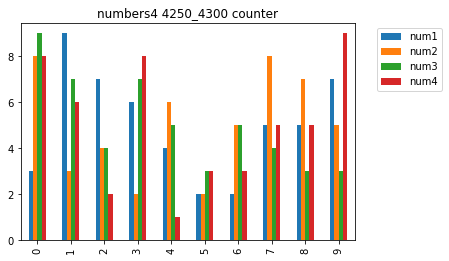

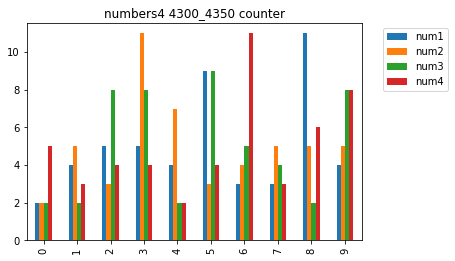

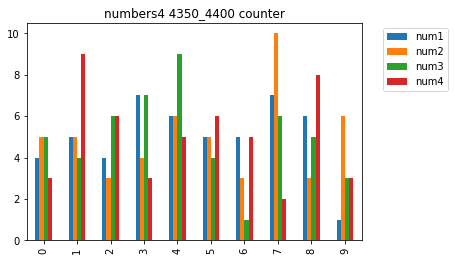

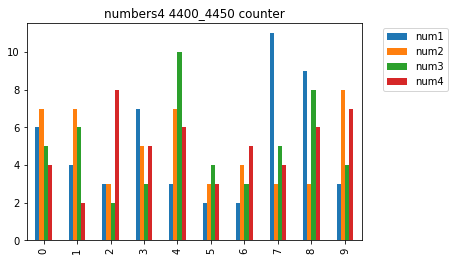

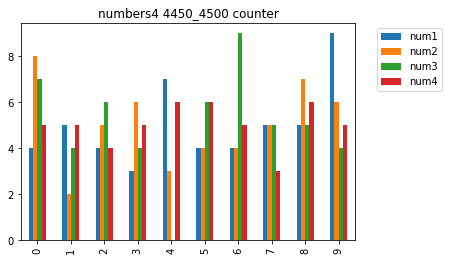

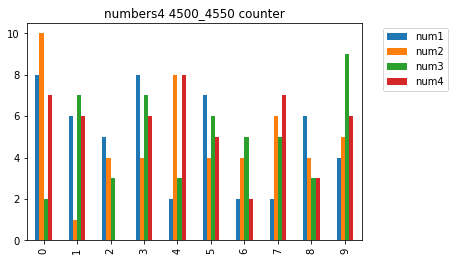

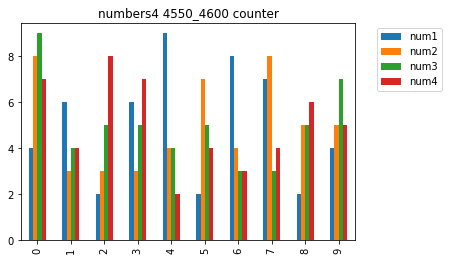

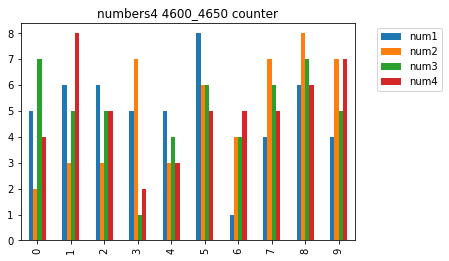

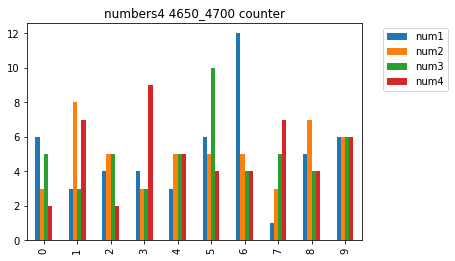

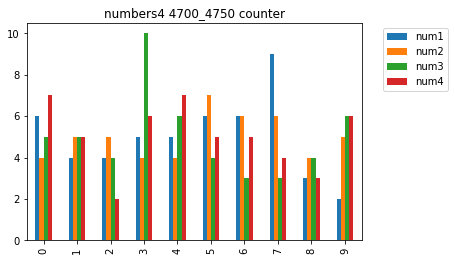

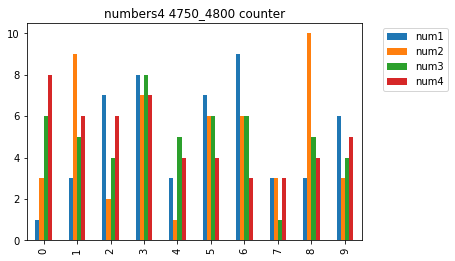

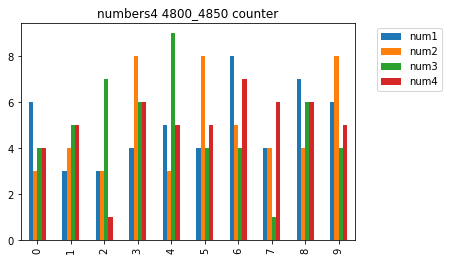

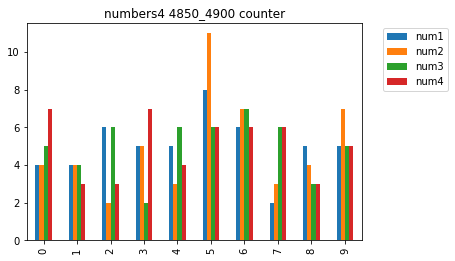

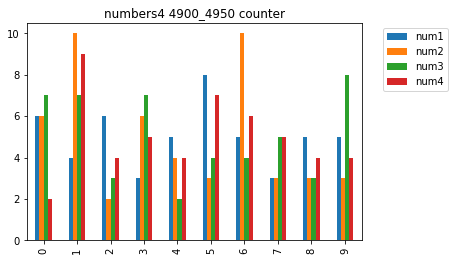

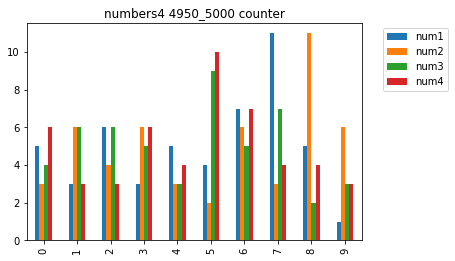

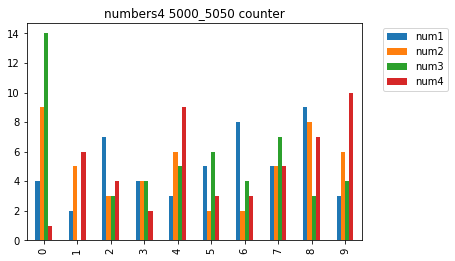

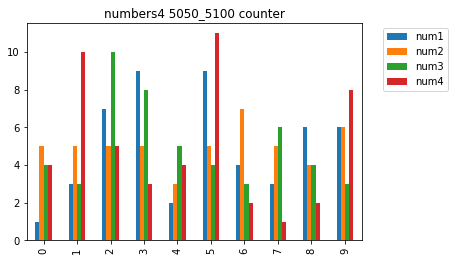

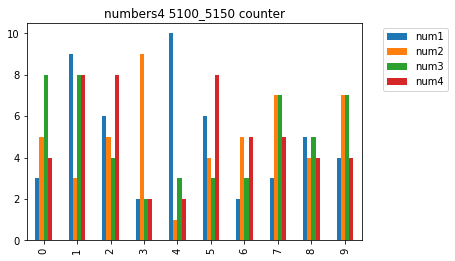

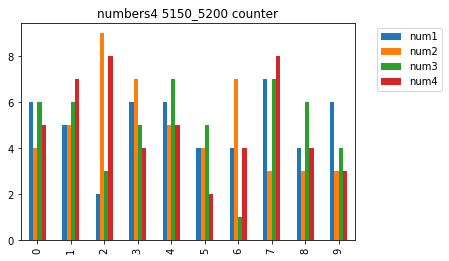

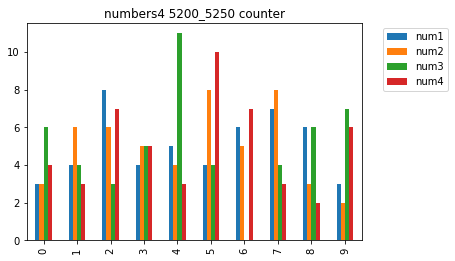

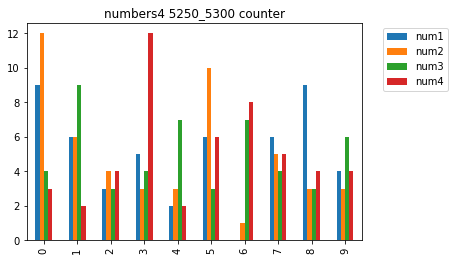

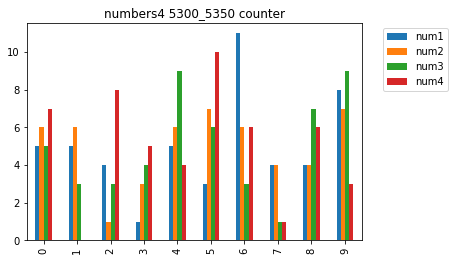

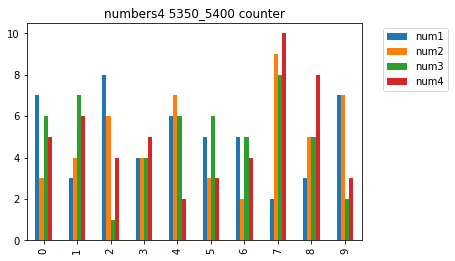

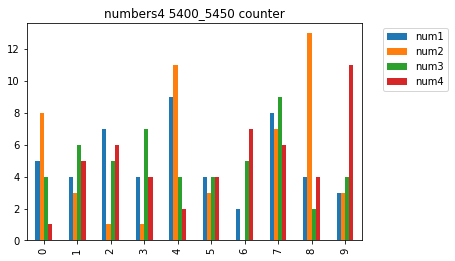

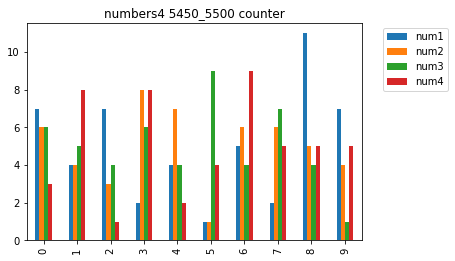

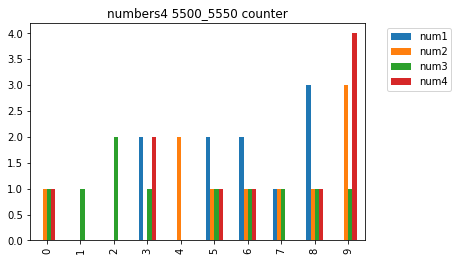

In [34]:
for i in range(len(n4)):
    n4[i].plot.bar()
    plt.title(f'numbers4 {i*50}_{(i+1)*50} counter')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [35]:
c = len(numbers3)//100+1

n3 = [0]*c
n4 = [0]*c
for i in range(0, len(numbers3)//100+1):
    tmp = [0]*7
    tmp[0] = numbers4[i*100:(i+1)*100].num1.value_counts()
    tmp[1] = numbers4[i*100:(i+1)*100].num2.value_counts()
    tmp[2] = numbers4[i*100:(i+1)*100].num3.value_counts()
    tmp[3] = numbers4[i*100:(i+1)*100].num4.value_counts()

    tmp[4] = numbers3[i*100:(i+1)*100].num1.value_counts()
    tmp[5] = numbers3[i*100:(i+1)*100].num2.value_counts()
    tmp[6] = numbers3[i*100:(i+1)*100].num3.value_counts()

    n4[i] = pd.concat([tmp[0], tmp[1], tmp[2], tmp[3]], axis=1).sort_index().fillna(0)
    n3[i] = pd.concat([tmp[4], tmp[5], tmp[6]], axis=1).sort_index().fillna(0)

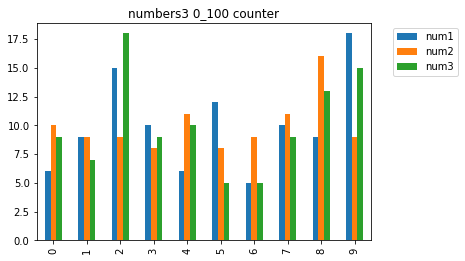

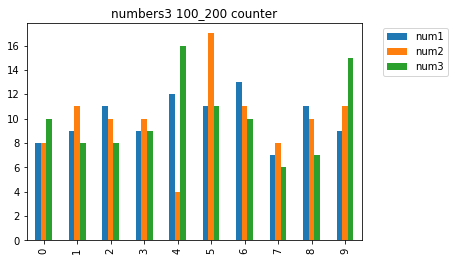

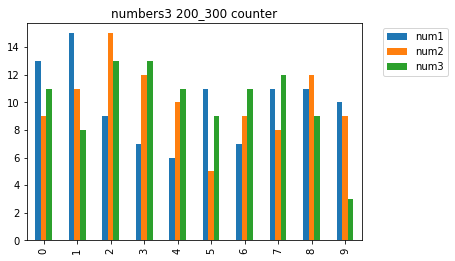

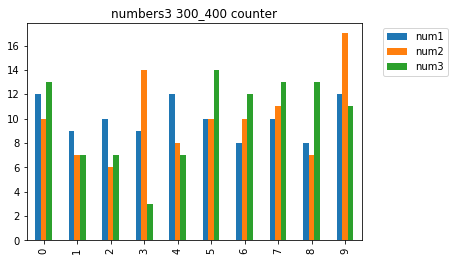

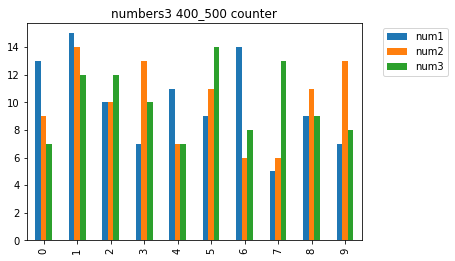

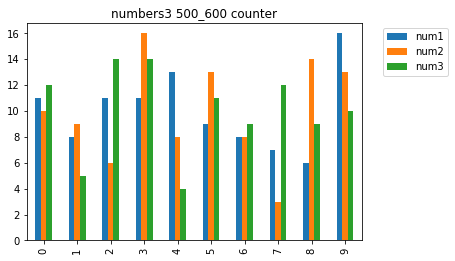

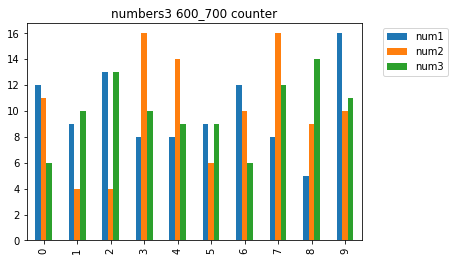

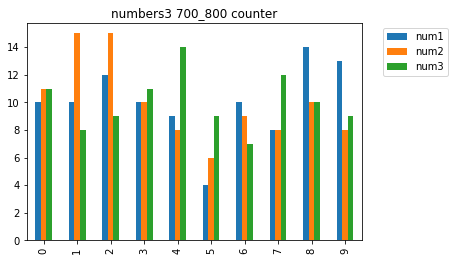

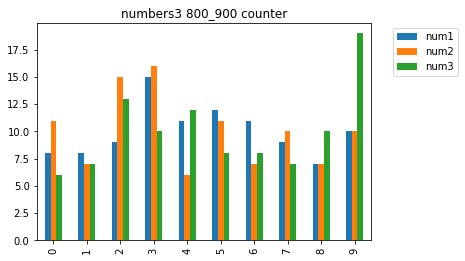

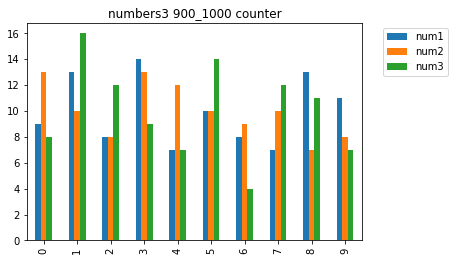

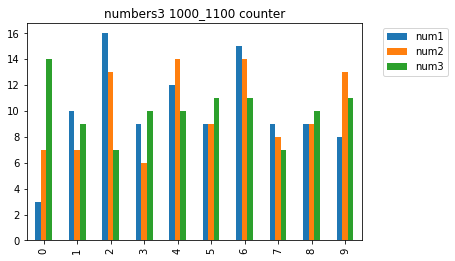

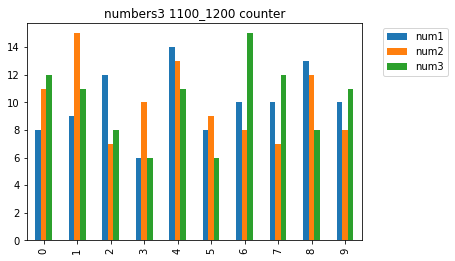

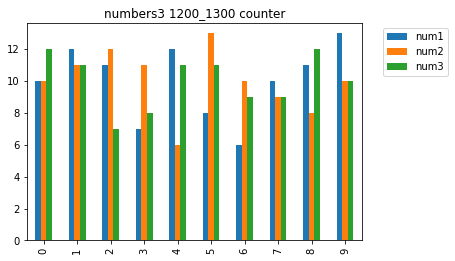

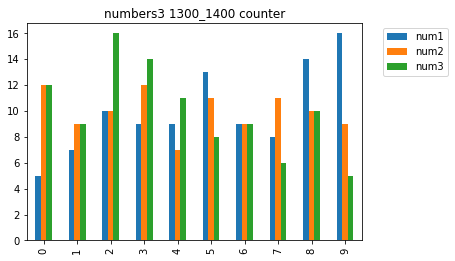

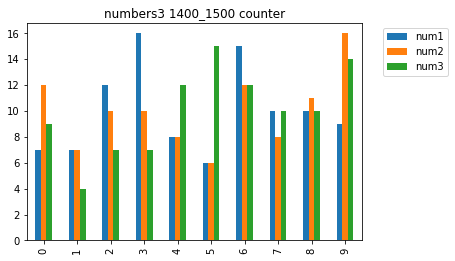

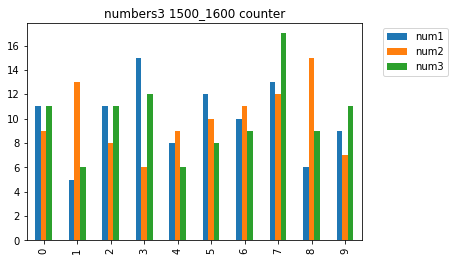

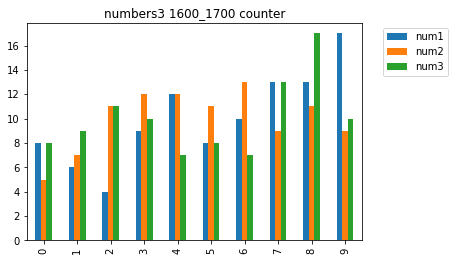

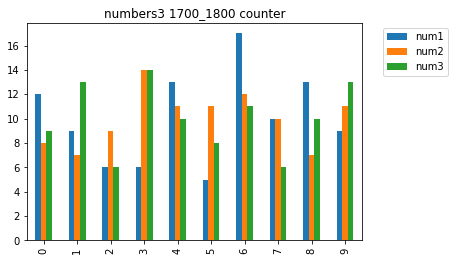

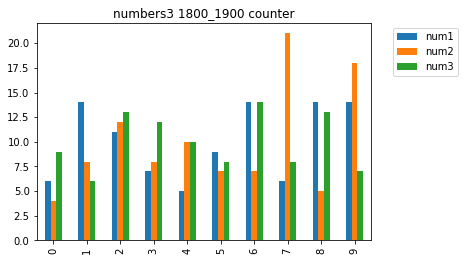

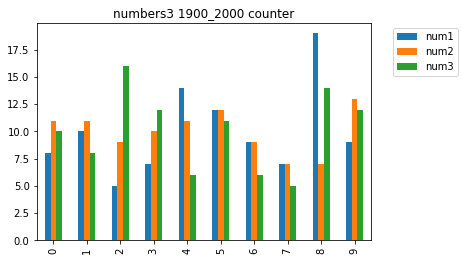

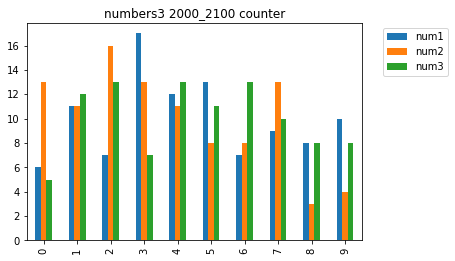

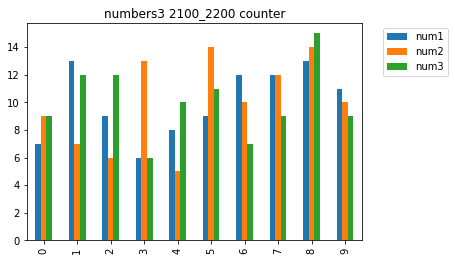

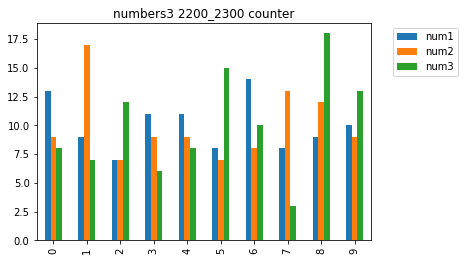

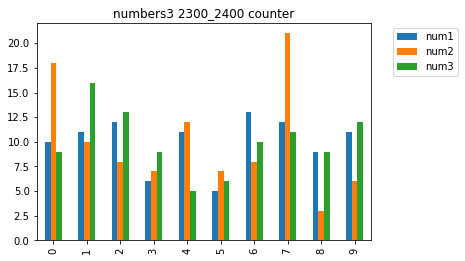

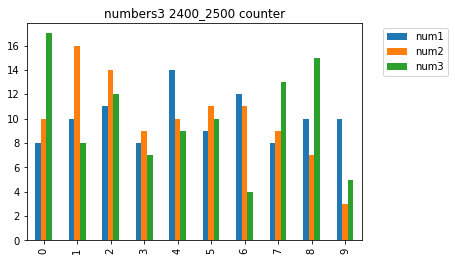

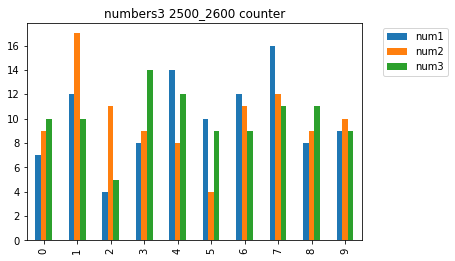

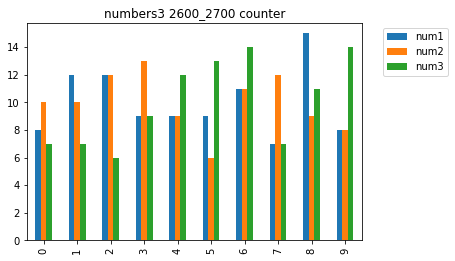

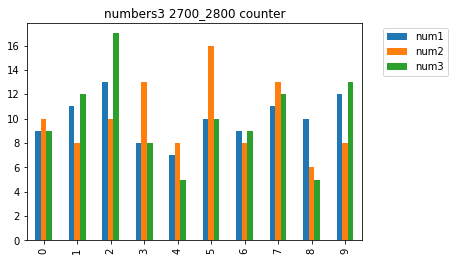

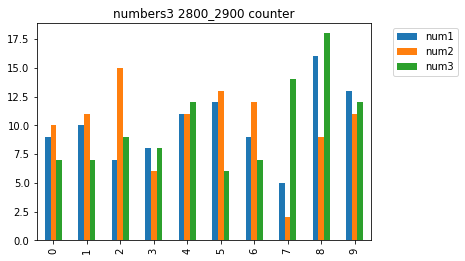

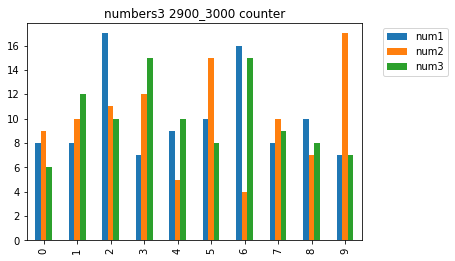

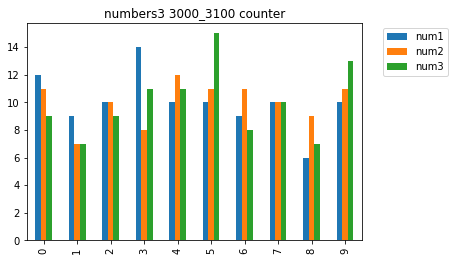

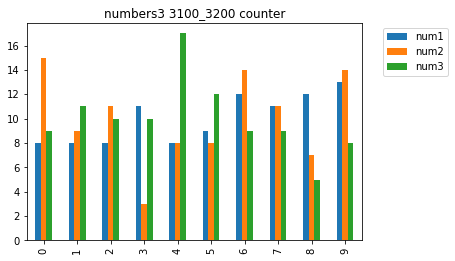

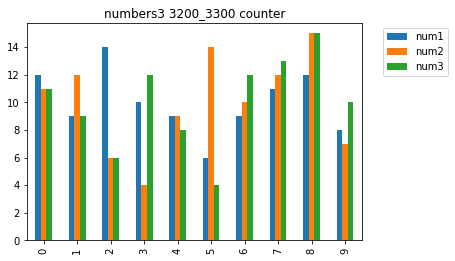

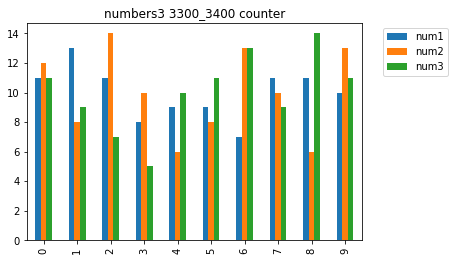

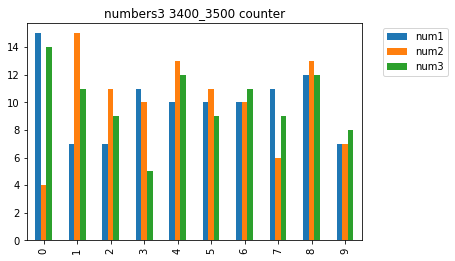

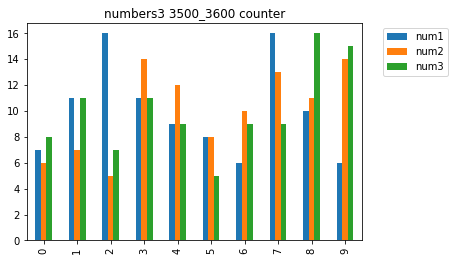

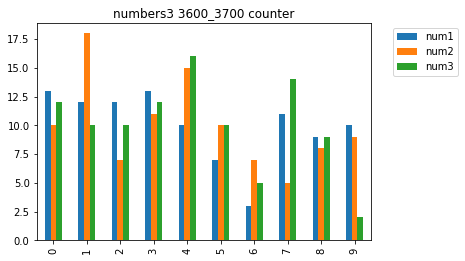

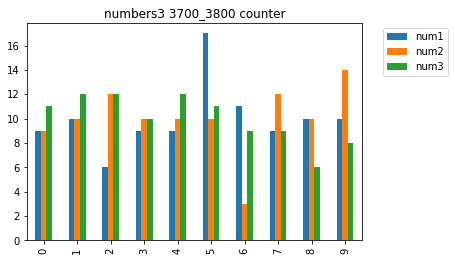

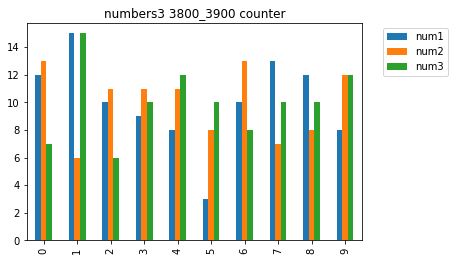

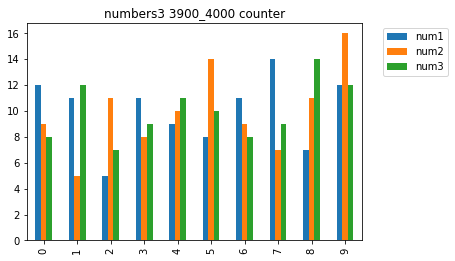

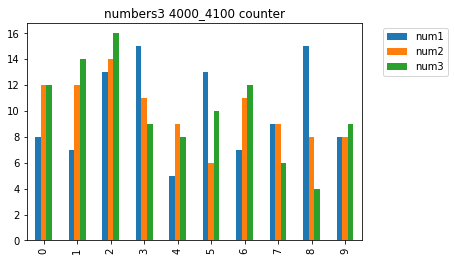

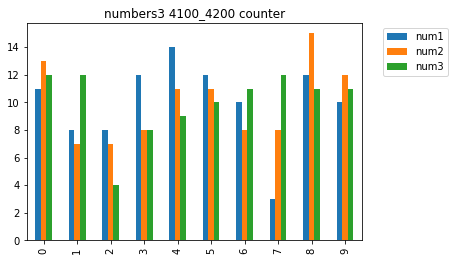

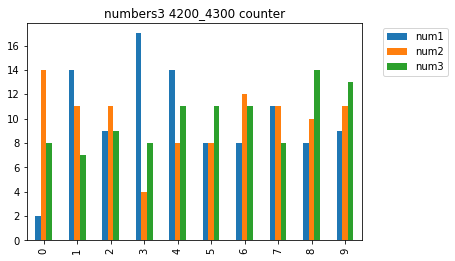

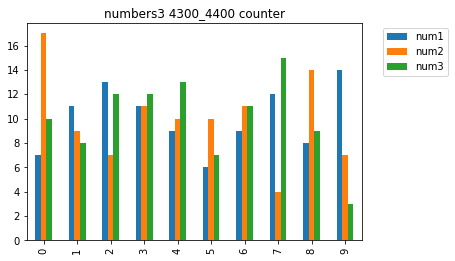

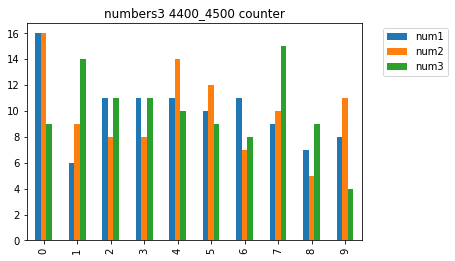

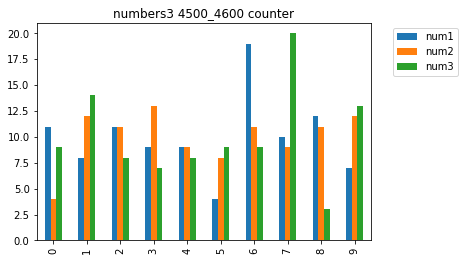

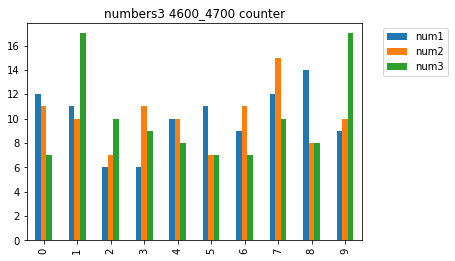

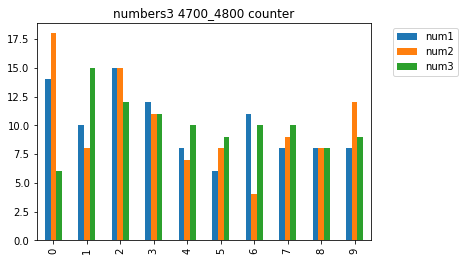

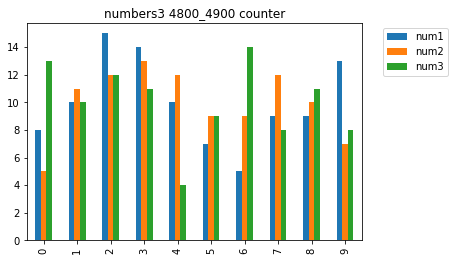

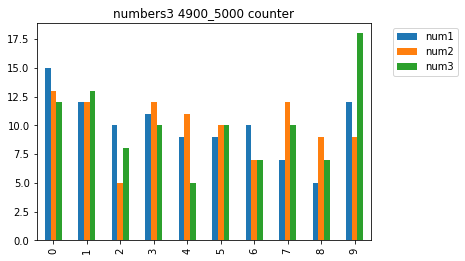

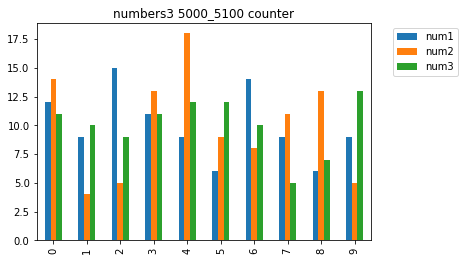

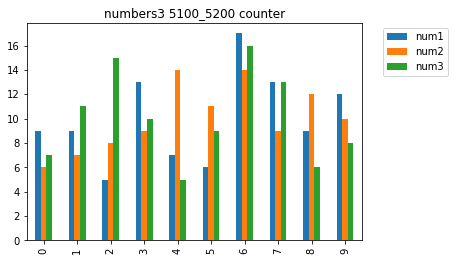

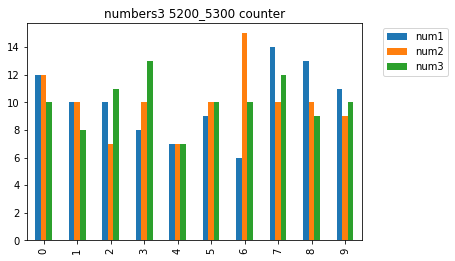

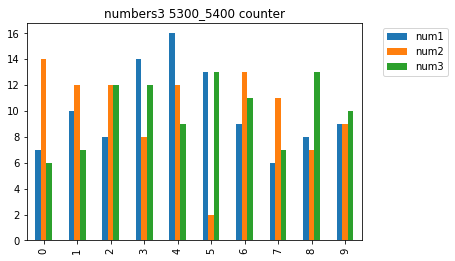

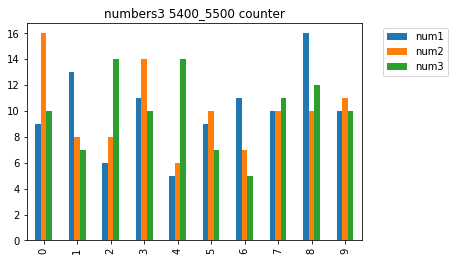

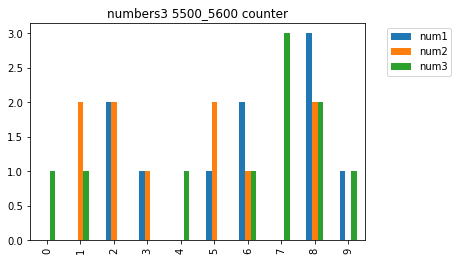

In [36]:
for i in range(len(n3)):
    n3[i].plot.bar()
    plt.title(f'numbers3 {i*100}_{(i+1)*100} counter')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

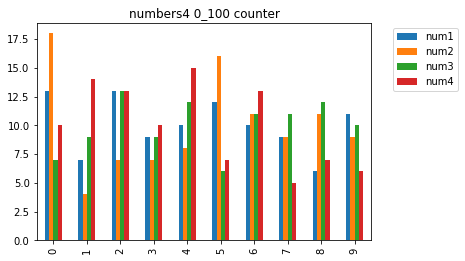

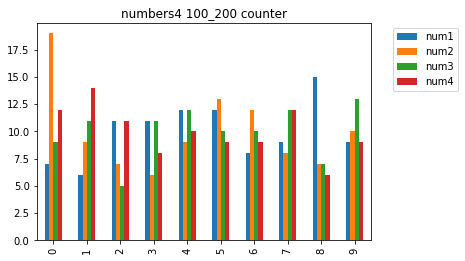

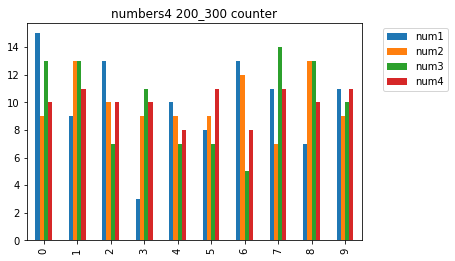

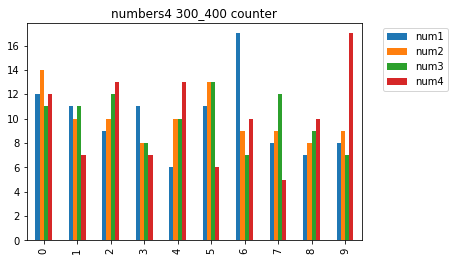

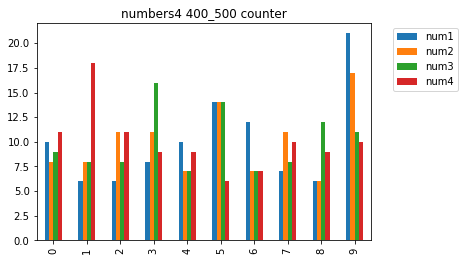

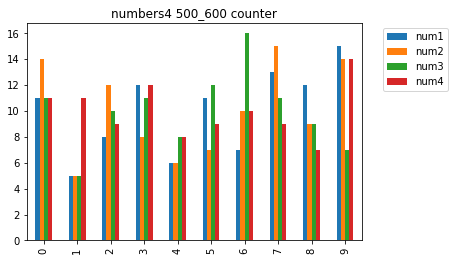

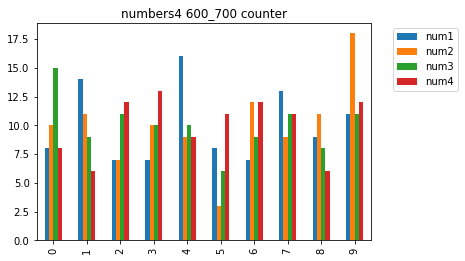

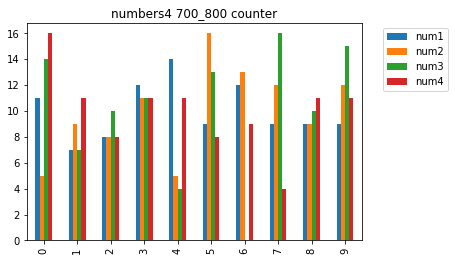

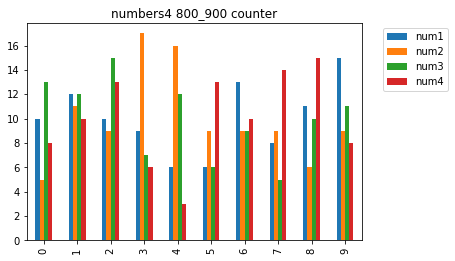

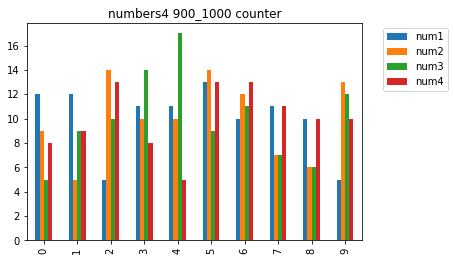

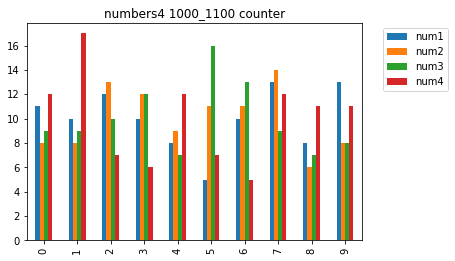

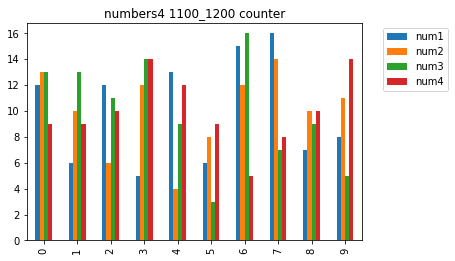

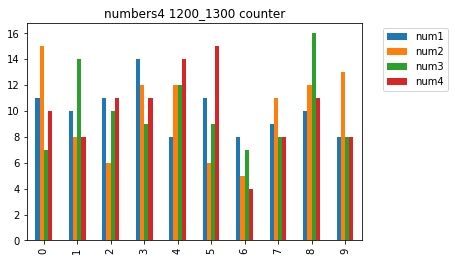

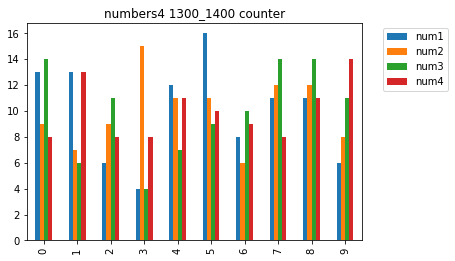

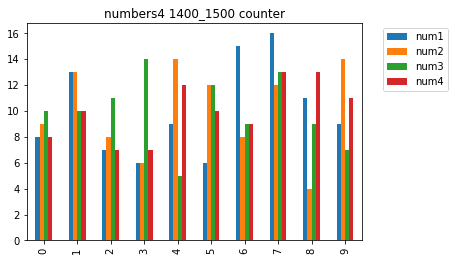

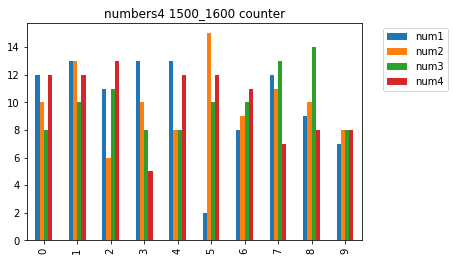

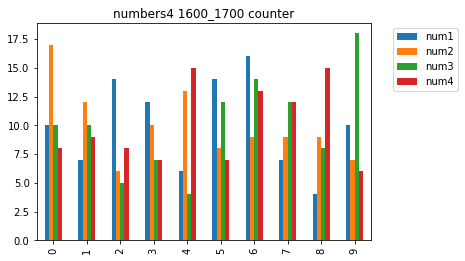

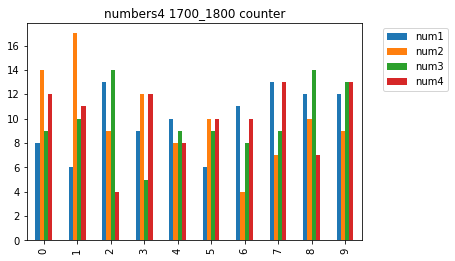

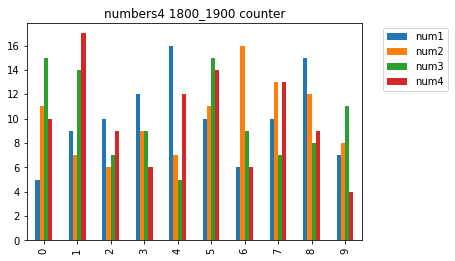

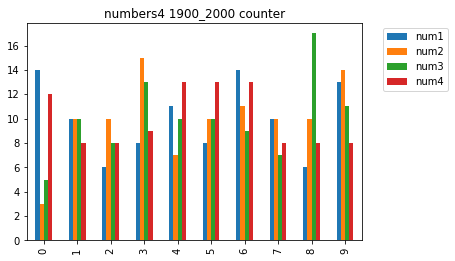

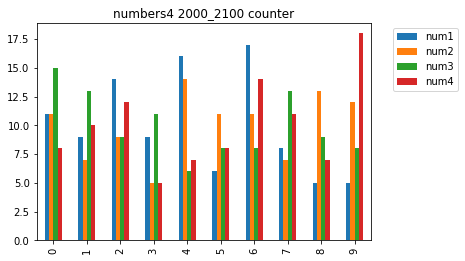

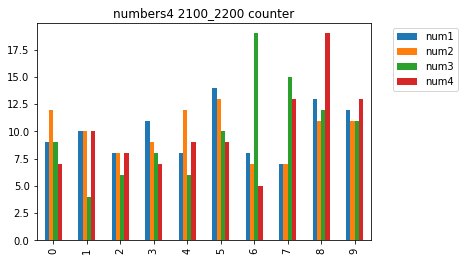

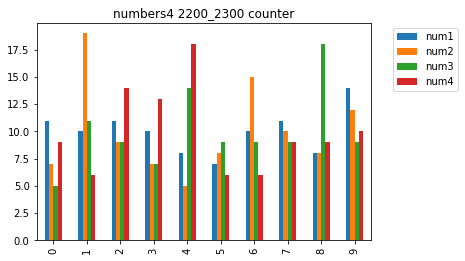

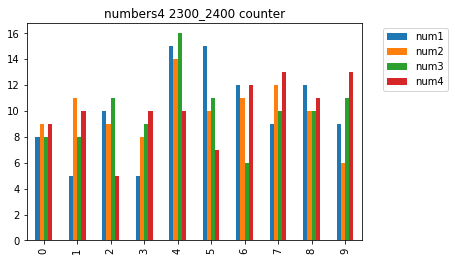

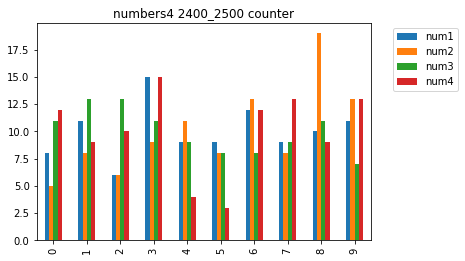

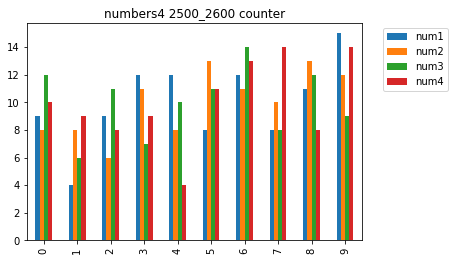

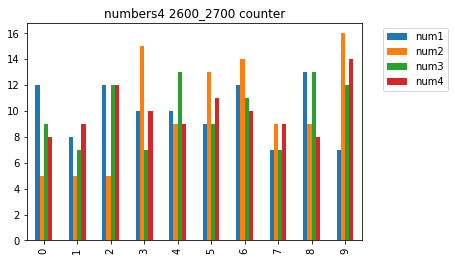

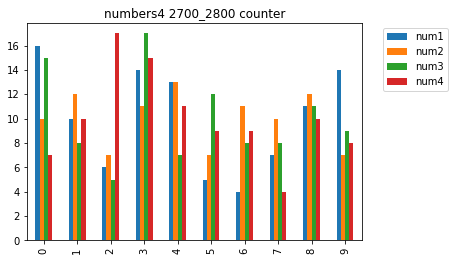

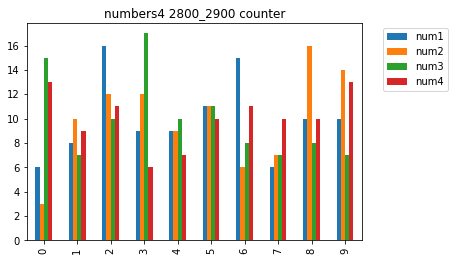

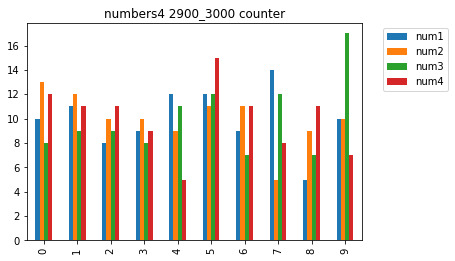

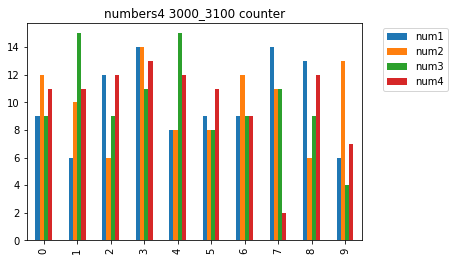

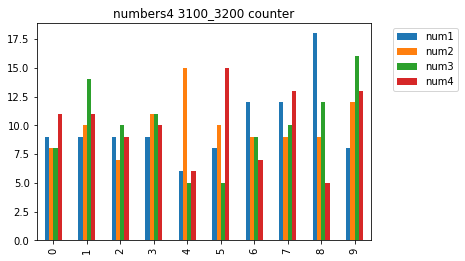

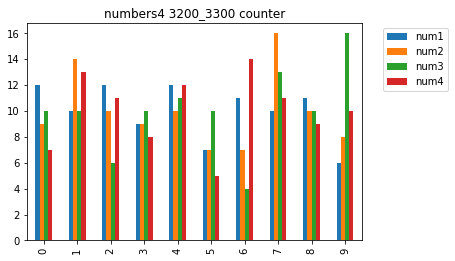

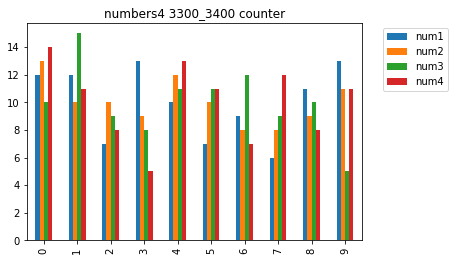

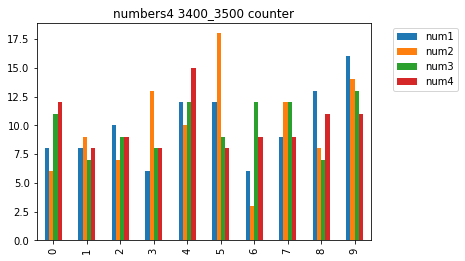

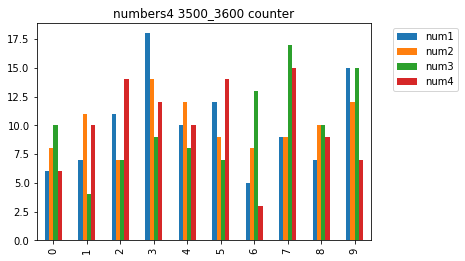

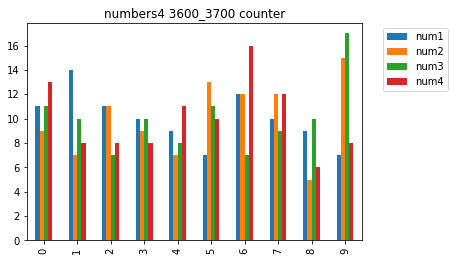

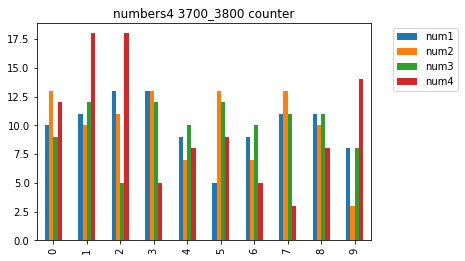

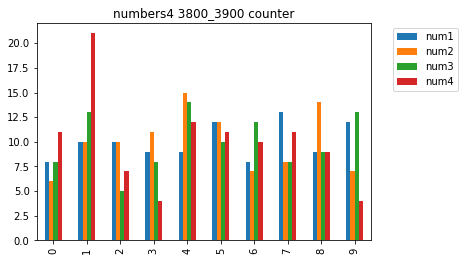

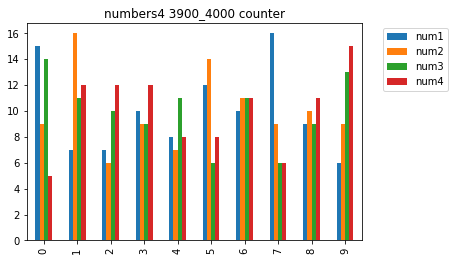

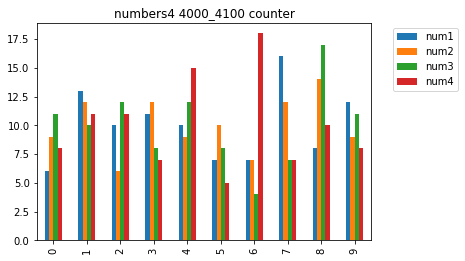

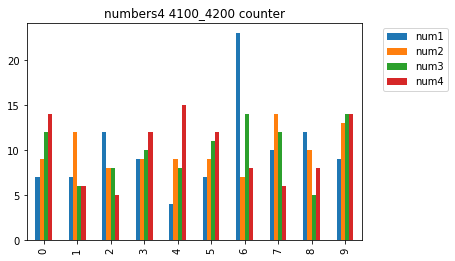

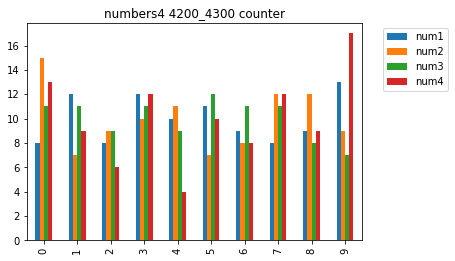

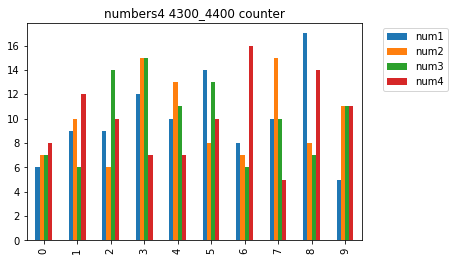

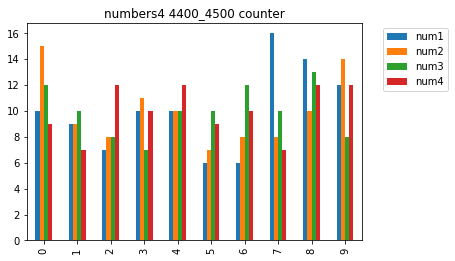

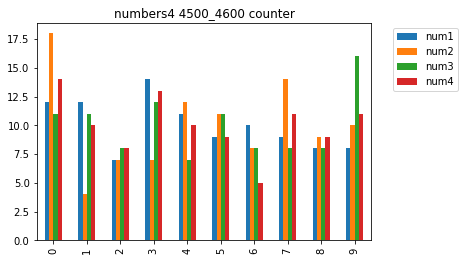

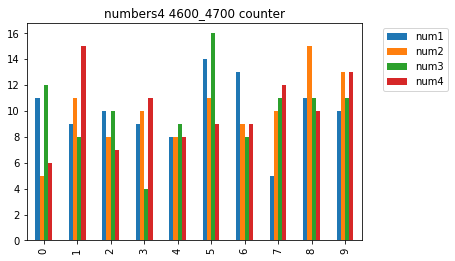

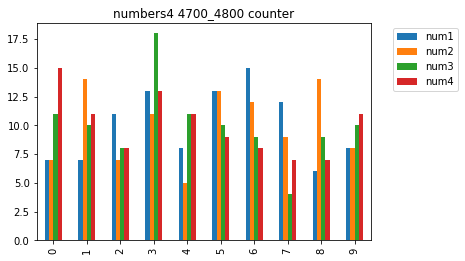

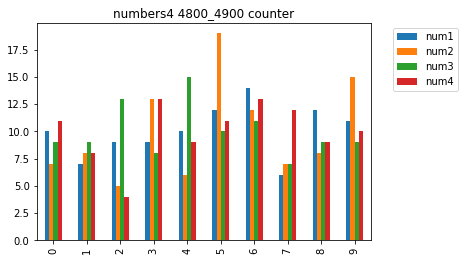

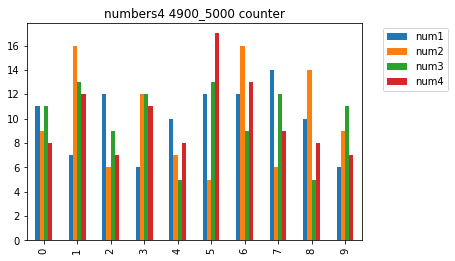

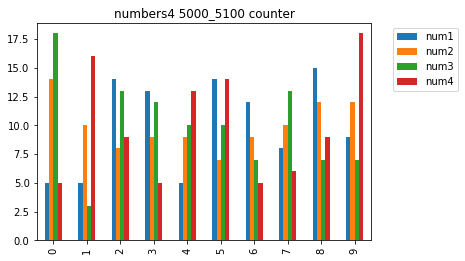

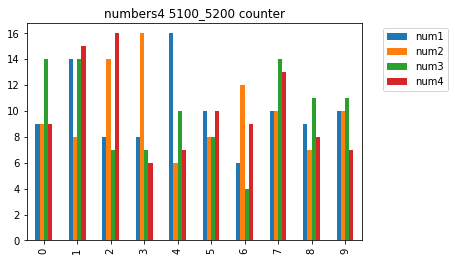

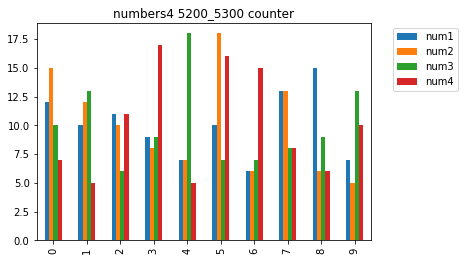

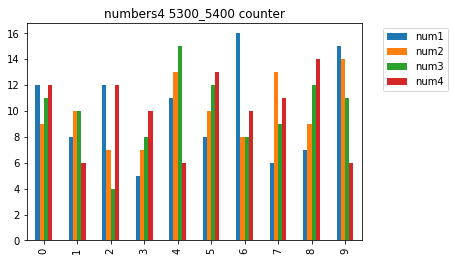

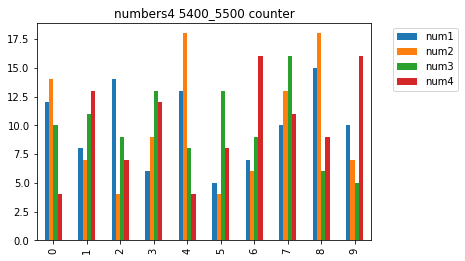

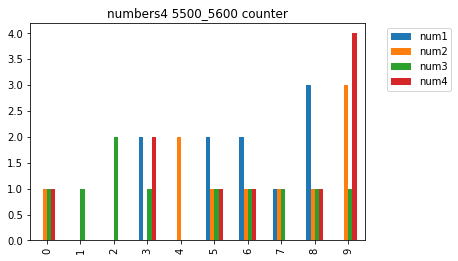

In [37]:
for i in range(len(n4)):
    n4[i].plot.bar()
    plt.title(f'numbers4 {i*100}_{(i+1)*100} counter')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [38]:
def next_occurrence(basis: str, row, num1: list, num2: list, num3: list, num4: list, a1: int, a2: int, a3: int, a4:int, number: int):
    if basis == row[3]:
        num1.append(a1)
        a1 = 0
    else:
        a1 += 1

    if basis == row[4]:
        num2.append(a2)
        a2 = 0
    else:
        a2 += 1

    if basis == row[5]:
        num3.append(a3)
        a3 = 0
    else:
        a3 += 1

    if number == 4:
        if basis == row[6]:
            num4.append(a4)
            a4 = 0
        else:
            a4 += 1

        return num1, num2, num3, num4, a1, a2, a3, a4

    return num1, num2, num3, a1, a2, a3

In [39]:
num0_1, num0_2, num0_3, a0_1, a0_2, a0_3 = [], [], [], 0, 0, 0
num1_1, num1_2, num1_3, a1_1, a1_2, a1_3 = [], [], [], 0, 0, 0
num2_1, num2_2, num2_3, a2_1, a2_2, a2_3 = [], [], [], 0, 0, 0
num3_1, num3_2, num3_3, a3_1, a3_2, a3_3 = [], [], [], 0, 0, 0
num4_1, num4_2, num4_3, a4_1, a4_2, a4_3 = [], [], [], 0, 0, 0
num5_1, num5_2, num5_3, a5_1, a5_2, a5_3 = [], [], [], 0, 0, 0
num6_1, num6_2, num6_3, a6_1, a6_2, a6_3 = [], [], [], 0, 0, 0
num7_1, num7_2, num7_3, a7_1, a7_2, a7_3 = [], [], [], 0, 0, 0
num8_1, num8_2, num8_3, a8_1, a8_2, a8_3 = [], [], [], 0, 0, 0
num9_1, num9_2, num9_3, a9_1, a9_2, a9_3 = [], [], [], 0, 0, 0

for row in numbers3.itertuples():
    num0_1, num0_2, num0_3, a0_1, a0_2, a0_3 = next_occurrence('0', row, num0_1, num0_2, num0_3, [], a0_1, a0_2, a0_3, 0, 3)
    num1_1, num1_2, num1_3, a1_1, a1_2, a1_3 = next_occurrence('1', row, num1_1, num1_2, num1_3, [], a1_1, a1_2, a1_3, 0, 3)
    num2_1, num2_2, num2_3, a2_1, a2_2, a2_3 = next_occurrence('2', row, num2_1, num2_2, num2_3, [], a2_1, a2_2, a2_3, 0, 3)
    num3_1, num3_2, num3_3, a3_1, a3_2, a3_3 = next_occurrence('3', row, num3_1, num3_2, num3_3, [], a3_1, a3_2, a3_3, 0, 3)
    num4_1, num4_2, num4_3, a4_1, a4_2, a4_3 = next_occurrence('4', row, num4_1, num4_2, num4_3, [], a4_1, a4_2, a4_3, 0, 3)
    num5_1, num5_2, num5_3, a5_1, a5_2, a5_3 = next_occurrence('5', row, num5_1, num5_2, num5_3, [], a5_1, a5_2, a5_3, 0, 3)
    num6_1, num6_2, num6_3, a6_1, a6_2, a6_3 = next_occurrence('6', row, num6_1, num6_2, num6_3, [], a6_1, a6_2, a6_3, 0, 3)
    num7_1, num7_2, num7_3, a7_1, a7_2, a7_3 = next_occurrence('7', row, num7_1, num7_2, num7_3, [], a7_1, a7_2, a7_3, 0, 3)
    num8_1, num8_2, num8_3, a8_1, a8_2, a8_3 = next_occurrence('8', row, num8_1, num8_2, num8_3, [], a8_1, a8_2, a8_3, 0, 3)
    num9_1, num9_2, num9_3, a9_1, a9_2, a9_3 = next_occurrence('9', row, num9_1, num9_2, num9_3, [], a9_1, a9_2, a9_3, 0, 3)

In [40]:
num0 = [sum(num0_1) / len(num0_1), sum(num0_2) / len(num0_2), sum(num0_3) / len(num0_3)]
num1 = [sum(num1_1) / len(num1_1), sum(num1_2) / len(num1_2), sum(num1_3) / len(num1_3)]
num2 = [sum(num2_1) / len(num2_1), sum(num2_2) / len(num2_2), sum(num2_3) / len(num2_3)]
num3 = [sum(num3_1) / len(num3_1), sum(num3_2) / len(num3_2), sum(num3_3) / len(num3_3)]
num4 = [sum(num4_1) / len(num4_1), sum(num4_2) / len(num4_2), sum(num4_3) / len(num4_3)]
num5 = [sum(num5_1) / len(num5_1), sum(num5_2) / len(num5_2), sum(num5_3) / len(num5_3)]
num6 = [sum(num6_1) / len(num6_1), sum(num6_2) / len(num6_2), sum(num6_3) / len(num6_3)]
num7 = [sum(num7_1) / len(num7_1), sum(num7_2) / len(num7_2), sum(num7_3) / len(num7_3)]
num8 = [sum(num8_1) / len(num8_1), sum(num8_2) / len(num8_2), sum(num8_3) / len(num8_3)]
num9 = [sum(num9_1) / len(num9_1), sum(num9_2) / len(num9_2), sum(num9_3) / len(num9_3)]

tmp = [num0, num1, num2, num3, num4, num5, num6, num7, num8, num9]
num = pd.DataFrame(tmp)
num

,0,1,2
0,9.379962,8.418525,9.415879
1,8.927798,9.010909,8.971014
2,8.819964,9.086081,8.548611
3,8.797153,8.549393,9.189239
4,9.121771,9.162662,9.209647
5,10.032064,9.342105,9.240672
6,8.629371,9.335835,9.469582
7,9.307692,8.940325,8.733216
8,8.537262,9.451613,8.535529
9,8.483649,8.681338,8.657895


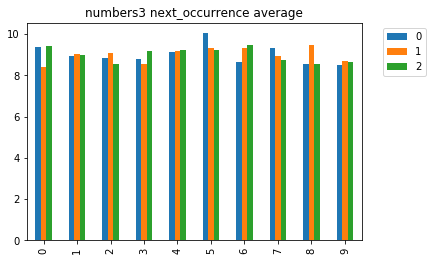

In [41]:
num.plot.bar()
plt.title('numbers3 next_occurrence average')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [42]:
num0_1, num0_2, num0_3, num0_4, a0_1, a0_2, a0_3, a0_4 = [], [], [], [], 0, 0, 0, 0
num1_1, num1_2, num1_3, num1_4, a1_1, a1_2, a1_3, a1_4 = [], [], [], [], 0, 0, 0, 0
num2_1, num2_2, num2_3, num2_4, a2_1, a2_2, a2_3, a2_4 = [], [], [], [], 0, 0, 0, 0
num3_1, num3_2, num3_3, num3_4, a3_1, a3_2, a3_3, a3_4 = [], [], [], [], 0, 0, 0, 0
num4_1, num4_2, num4_3, num4_4, a4_1, a4_2, a4_3, a4_4 = [], [], [], [], 0, 0, 0, 0
num5_1, num5_2, num5_3, num5_4, a5_1, a5_2, a5_3, a5_4 = [], [], [], [], 0, 0, 0, 0
num6_1, num6_2, num6_3, num6_4, a6_1, a6_2, a6_3, a6_4 = [], [], [], [], 0, 0, 0, 0
num7_1, num7_2, num7_3, num7_4, a7_1, a7_2, a7_3, a7_4 = [], [], [], [], 0, 0, 0, 0
num8_1, num8_2, num8_3, num8_4, a8_1, a8_2, a8_3, a8_4 = [], [], [], [], 0, 0, 0, 0
num9_1, num9_2, num9_3, num9_4, a9_1, a9_2, a9_3, a9_4 = [], [], [], [], 0, 0, 0, 0

for row in numbers4.itertuples():
    num0_1, num0_2, num0_3, num0_4, a0_1, a0_2, a0_3, a0_4 = next_occurrence('0', row, num0_1, num0_2, num0_3, num0_4, a0_1, a0_2, a0_3, a0_4, 4)
    num1_1, num1_2, num1_3, num1_4, a1_1, a1_2, a1_3, a1_4 = next_occurrence('1', row, num1_1, num1_2, num1_3, num1_4, a1_1, a1_2, a1_3, a1_4, 4)
    num2_1, num2_2, num2_3, num2_4, a2_1, a2_2, a2_3, a2_4 = next_occurrence('2', row, num2_1, num2_2, num2_3, num2_4, a2_1, a2_2, a2_3, a2_4, 4)
    num3_1, num3_2, num3_3, num3_4, a3_1, a3_2, a3_3, a3_4 = next_occurrence('3', row, num3_1, num3_2, num3_3, num3_4, a3_1, a3_2, a3_3, a3_4, 4)
    num4_1, num4_2, num4_3, num4_4, a4_1, a4_2, a4_3, a4_4 = next_occurrence('4', row, num4_1, num4_2, num4_3, num4_4, a4_1, a4_2, a4_3, a4_4, 4)
    num5_1, num5_2, num5_3, num5_4, a5_1, a5_2, a5_3, a5_4 = next_occurrence('5', row, num5_1, num5_2, num5_3, num5_4, a5_1, a5_2, a5_3, a5_4, 4)
    num6_1, num6_2, num6_3, num6_4, a6_1, a6_2, a6_3, a6_4 = next_occurrence('6', row, num6_1, num6_2, num6_3, num6_4, a6_1, a6_2, a6_3, a6_4, 4)
    num7_1, num7_2, num7_3, num7_4, a7_1, a7_2, a7_3, a7_4 = next_occurrence('7', row, num7_1, num7_2, num7_3, num7_4, a7_1, a7_2, a7_3, a7_4, 4)
    num8_1, num8_2, num8_3, num8_4, a8_1, a8_2, a8_3, a8_4 = next_occurrence('8', row, num8_1, num8_2, num8_3, num8_4, a8_1, a8_2, a8_3, a8_4, 4)
    num9_1, num9_2, num9_3, num9_4, a9_1, a9_2, a9_3, a9_4 = next_occurrence('9', row, num9_1, num9_2, num9_3, num9_4, a9_1, a9_2, a9_3, a9_4, 4)

In [43]:
num0 = [sum(num0_1) / len(num0_1), sum(num0_2) / len(num0_2), sum(num0_3) / len(num0_3), sum(num0_4) / len(num0_4)]
num1 = [sum(num1_1) / len(num1_1), sum(num1_2) / len(num1_2), sum(num1_3) / len(num1_3), sum(num1_4) / len(num1_4)]
num2 = [sum(num2_1) / len(num2_1), sum(num2_2) / len(num2_2), sum(num2_3) / len(num2_3), sum(num2_4) / len(num2_4)]
num3 = [sum(num3_1) / len(num3_1), sum(num3_2) / len(num3_2), sum(num3_3) / len(num3_3), sum(num3_4) / len(num3_4)]
num4 = [sum(num4_1) / len(num4_1), sum(num4_2) / len(num4_2), sum(num4_3) / len(num4_3), sum(num4_4) / len(num4_4)]
num5 = [sum(num5_1) / len(num5_1), sum(num5_2) / len(num5_2), sum(num5_3) / len(num5_3), sum(num5_4) / len(num5_4)]
num6 = [sum(num6_1) / len(num6_1), sum(num6_2) / len(num6_2), sum(num6_3) / len(num6_3), sum(num6_4) / len(num6_4)]
num7 = [sum(num7_1) / len(num7_1), sum(num7_2) / len(num7_2), sum(num7_3) / len(num7_3), sum(num7_4) / len(num7_4)]
num8 = [sum(num8_1) / len(num8_1), sum(num8_2) / len(num8_2), sum(num8_3) / len(num8_3), sum(num8_4) / len(num8_4)]
num9 = [sum(num9_1) / len(num9_1), sum(num9_2) / len(num9_2), sum(num9_3) / len(num9_3), sum(num9_4) / len(num9_4)]

tmp = [num0, num1, num2, num3, num4, num5, num6, num7, num8, num9]
num = pd.DataFrame(tmp)
num

,0,1,2,3
0,8.961887,8.851521,8.406838,9.045620
1,9.910537,9.001821,9.138122,8.209380
2,9.036496,11.081678,9.767123,8.978062
3,9.021858,8.512111,8.902878,9.509542
4,8.897297,9.316479,9.140741,9.171322
5,9.415879,8.442539,8.899281,8.933213
6,8.362245,9.424242,9.693204,9.125000
7,8.745133,8.693662,8.783304,9.378072
8,8.750442,8.853309,8.874552,9.447818
9,8.850987,8.198664,8.449400,8.137645


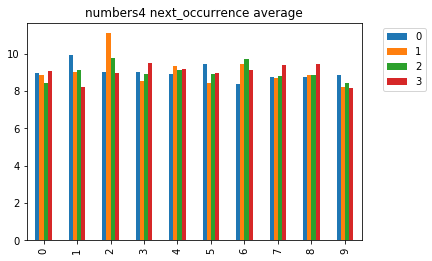

In [44]:
num.plot.bar()
plt.title('numbers4 next_occurrence average')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [45]:
def multi_demension_convert(l, cols):
    return [l[i:i + cols] for i in range(0, len(l), cols)]

next_num_count_3_1 = multi_demension_convert([0]*100, 10)
next_num_count_3_2 = multi_demension_convert([0]*100, 10)
next_num_count_3_3 = multi_demension_convert([0]*100, 10)
next_num_count_4_1 = multi_demension_convert([0]*100, 10)
next_num_count_4_2 = multi_demension_convert([0]*100, 10)
next_num_count_4_3 = multi_demension_convert([0]*100, 10)
next_num_count_4_4 = multi_demension_convert([0]*100, 10)

In [46]:
def next_num_counter(numbers:int, num:int, list_name:list):
    past_num = 99
    for row in numbers.itertuples():
        now_num = int(row[num])
        if past_num == 99:
            past_num = now_num
            pass
        else:
            list_name[past_num][now_num] += 1
            past_num = now_num

    return list_name

In [47]:
next_num_count_3_1 = next_num_counter(numbers3, 3, next_num_count_3_1)
next_num_count_3_2 = next_num_counter(numbers3, 4, next_num_count_3_2)
next_num_count_3_3 = next_num_counter(numbers3, 5, next_num_count_3_3)
next_num_count_4_1 = next_num_counter(numbers4, 3, next_num_count_4_1)
next_num_count_4_2 = next_num_counter(numbers4, 4, next_num_count_4_2)
next_num_count_4_3 = next_num_counter(numbers4, 5, next_num_count_4_3)
next_num_count_4_4 = next_num_counter(numbers4, 6, next_num_count_4_4)

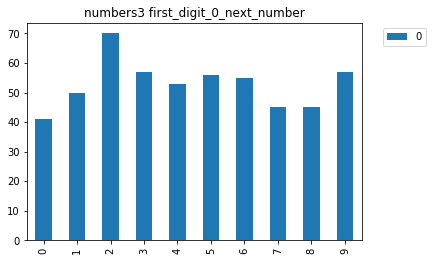

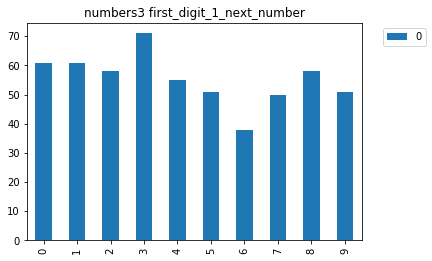

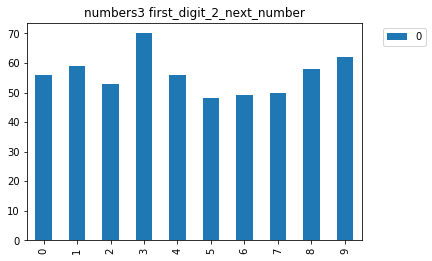

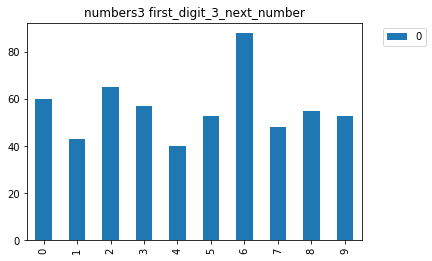

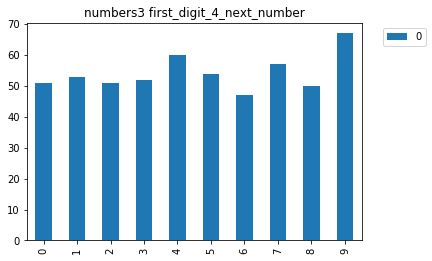

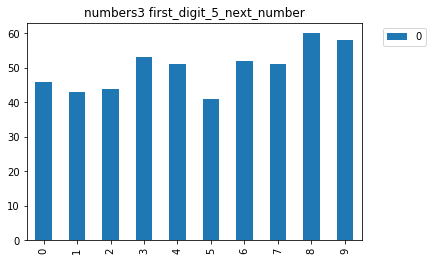

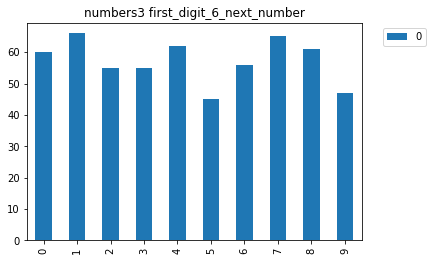

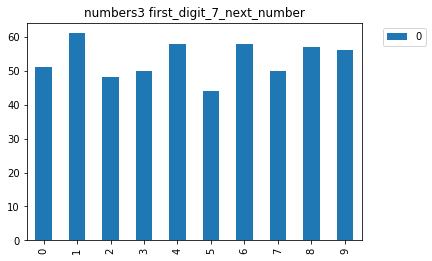

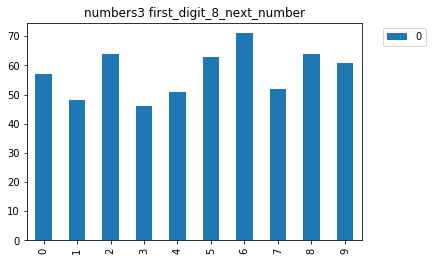

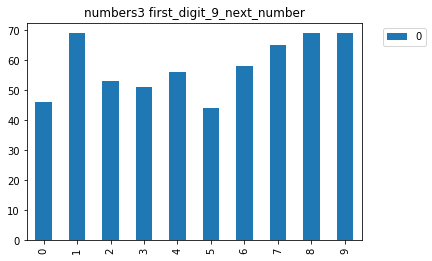

In [48]:
for i in range(10):
    graph = pd.DataFrame(next_num_count_3_1[i])
    graph.plot.bar()
    plt.title(f'numbers3 first_digit_{i}_next_number')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

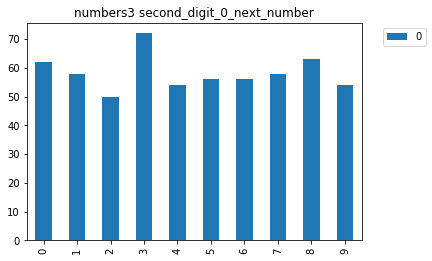

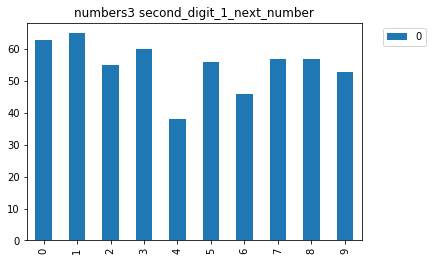

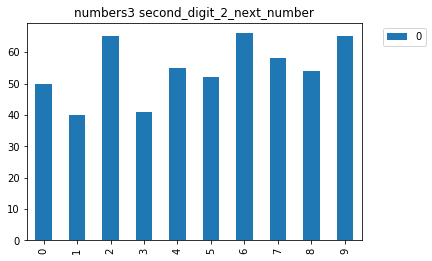

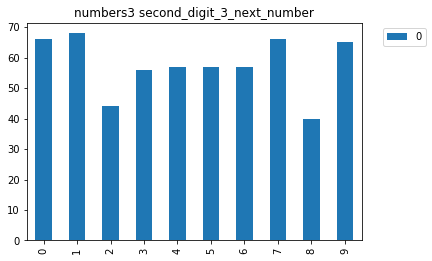

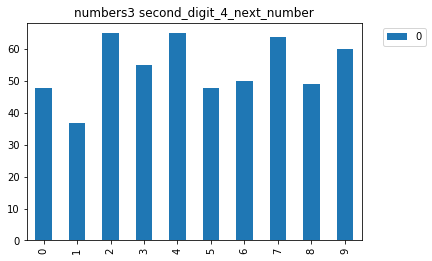

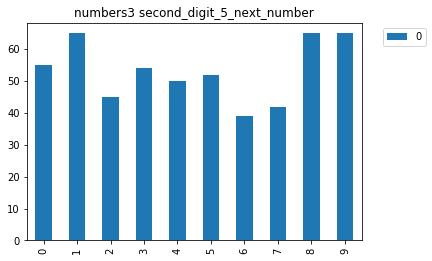

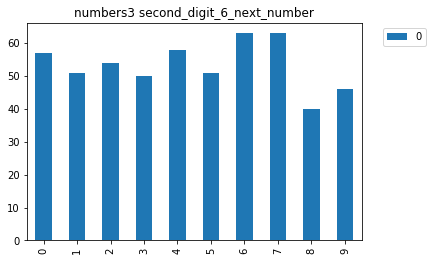

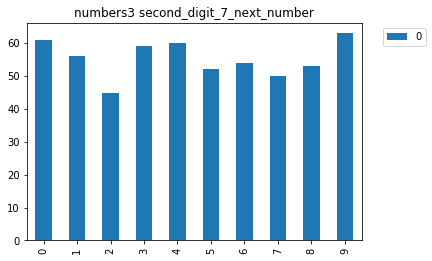

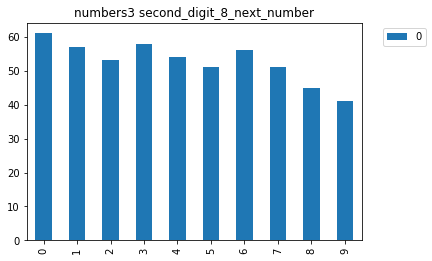

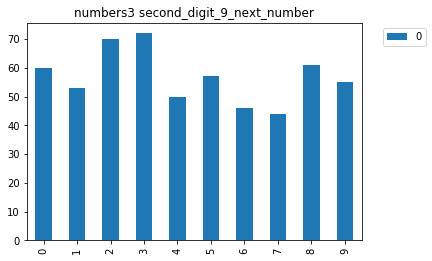

In [49]:
for i in range(10):
    graph = pd.DataFrame(next_num_count_3_2[i])
    graph.plot.bar()
    plt.title(f'numbers3 second_digit_{i}_next_number')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

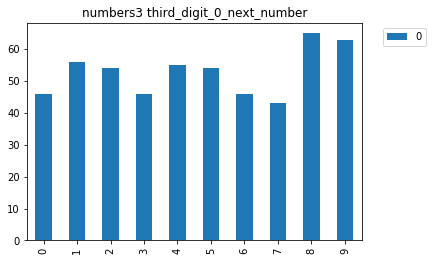

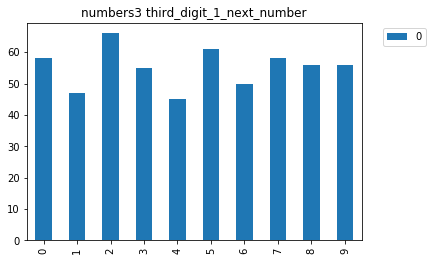

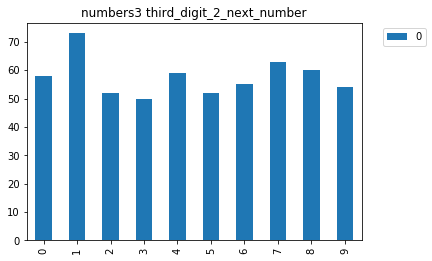

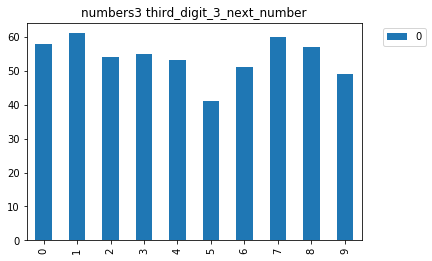

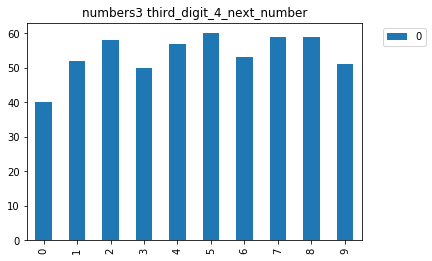

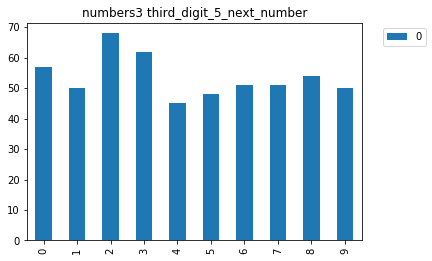

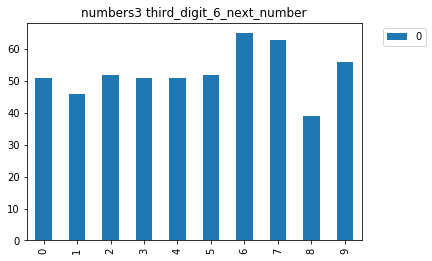

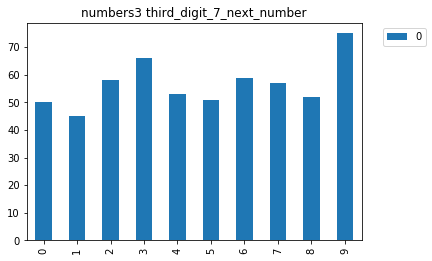

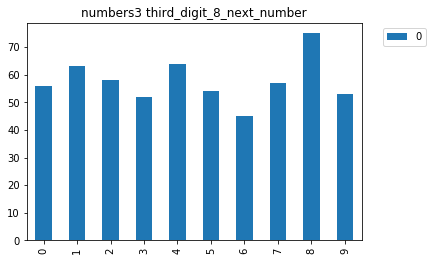

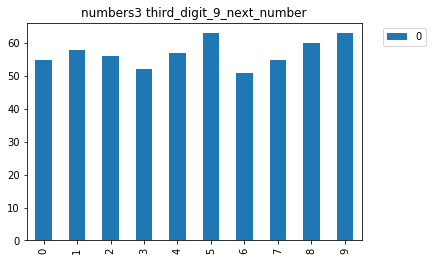

In [50]:
for i in range(10):
    graph = pd.DataFrame(next_num_count_3_3[i])
    graph.plot.bar()
    plt.title(f'numbers3 third_digit_{i}_next_number')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

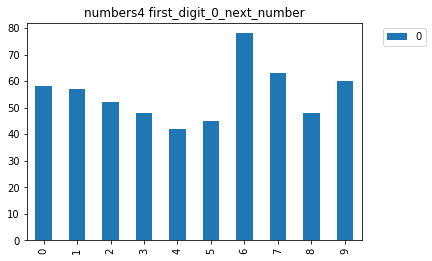

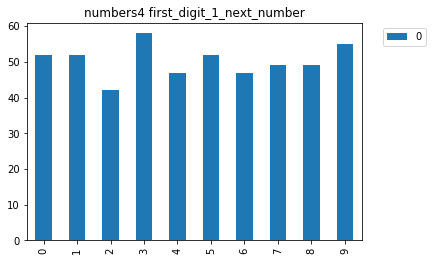

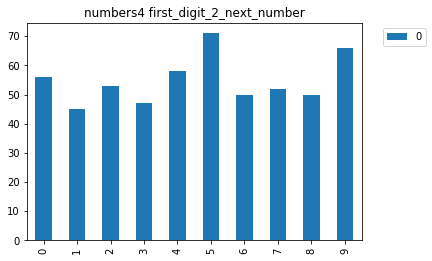

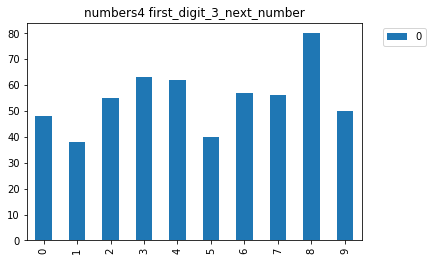

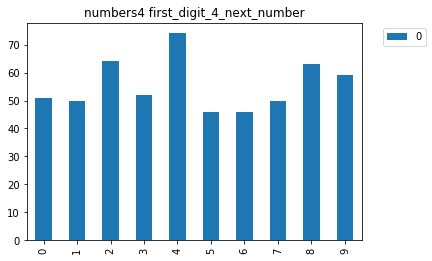

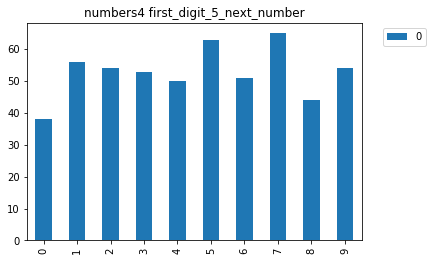

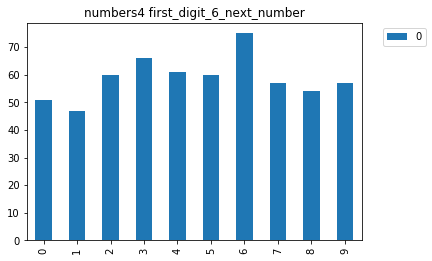

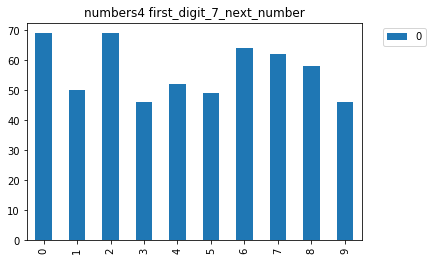

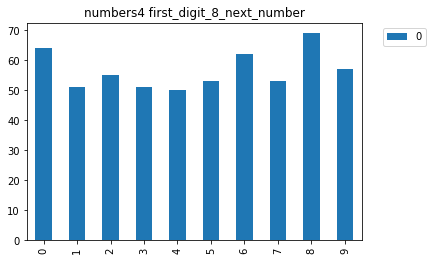

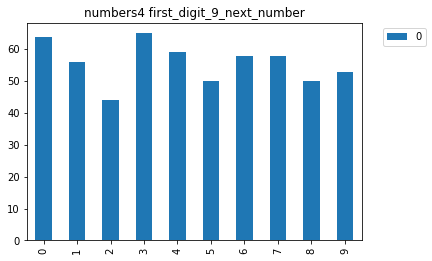

In [51]:
for i in range(10):
    graph = pd.DataFrame(next_num_count_4_1[i])
    graph.plot.bar()
    plt.title(f'numbers4 first_digit_{i}_next_number')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

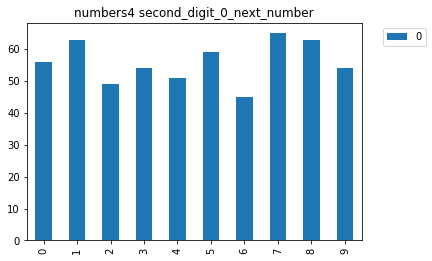

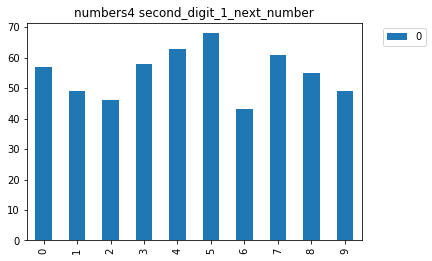

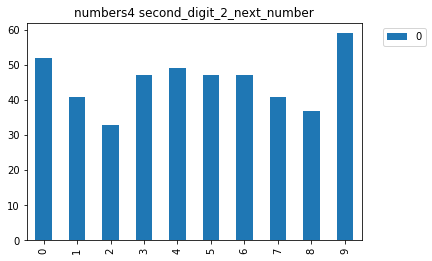

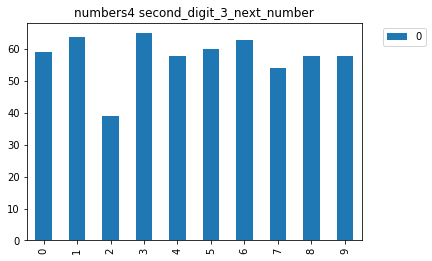

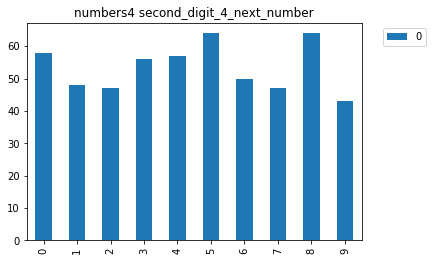

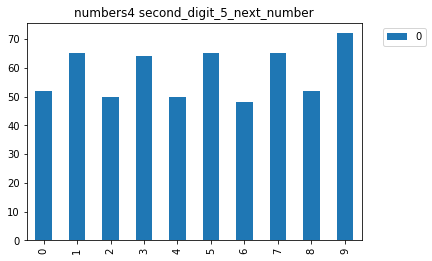

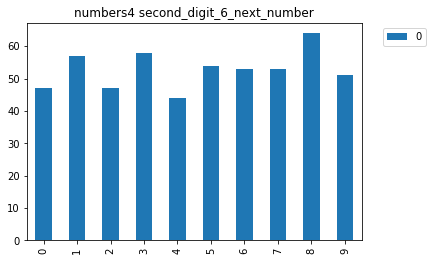

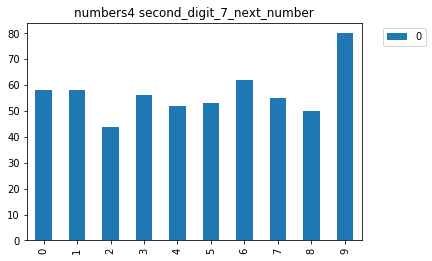

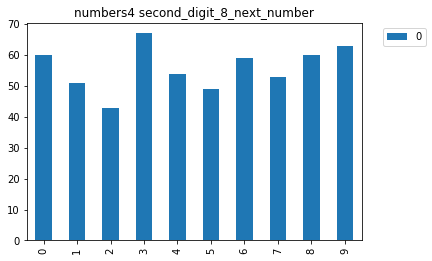

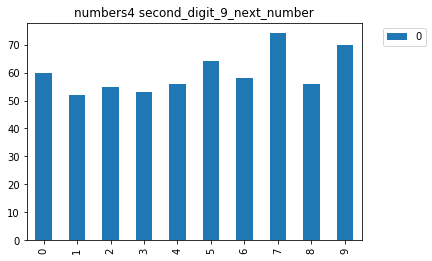

In [52]:
for i in range(10):
    graph = pd.DataFrame(next_num_count_4_2[i])
    graph.plot.bar()
    plt.title(f'numbers4 second_digit_{i}_next_number')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

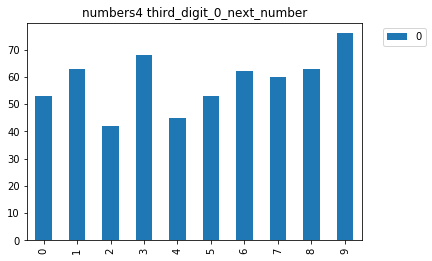

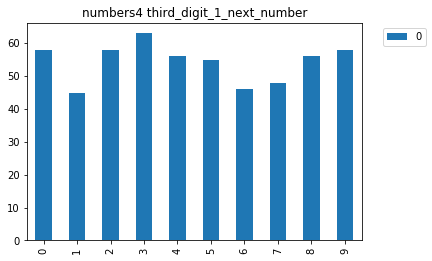

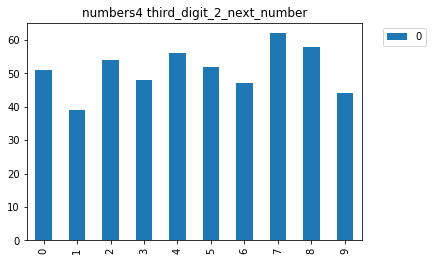

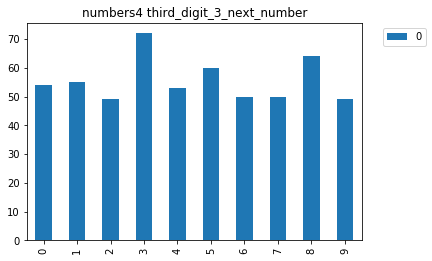

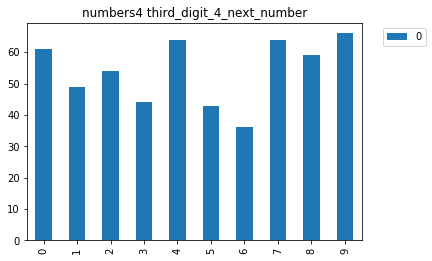

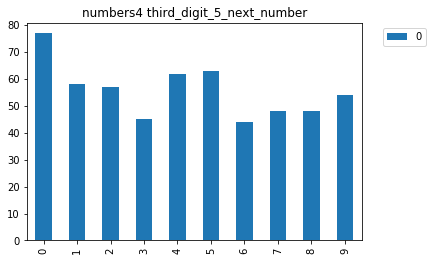

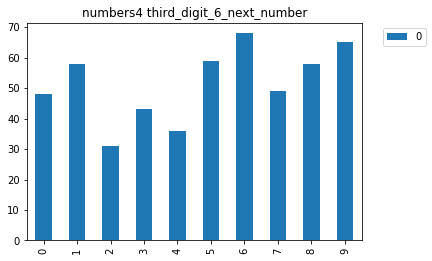

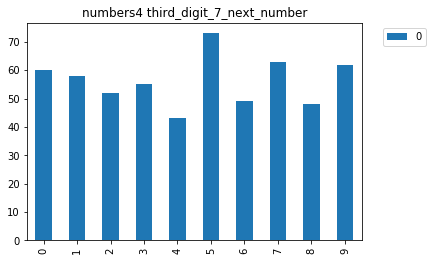

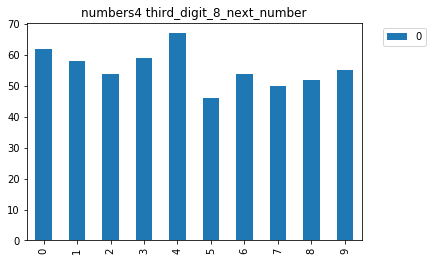

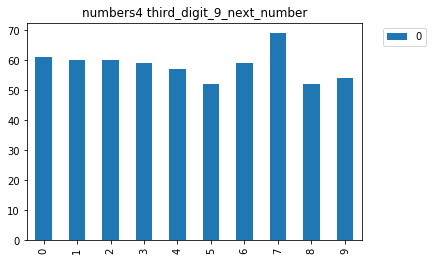

In [53]:
for i in range(10):
    graph = pd.DataFrame(next_num_count_4_3[i])
    graph.plot.bar()
    plt.title(f'numbers4 third_digit_{i}_next_number')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

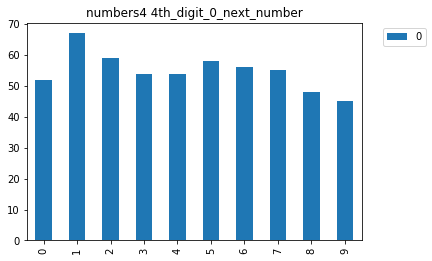

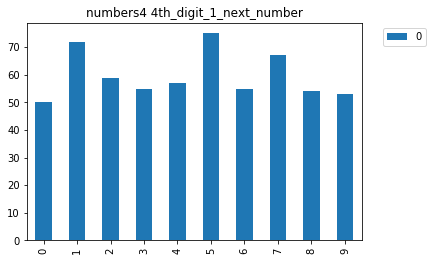

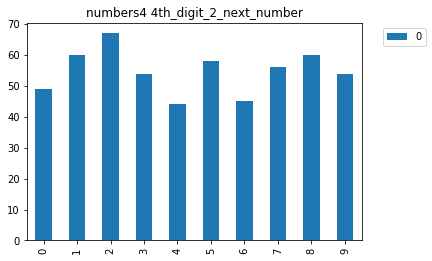

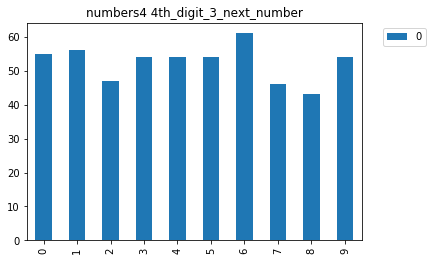

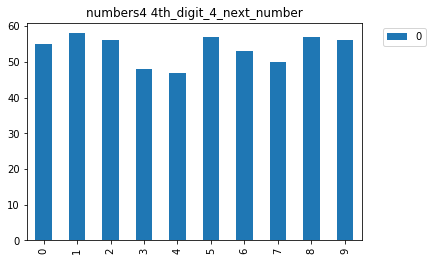

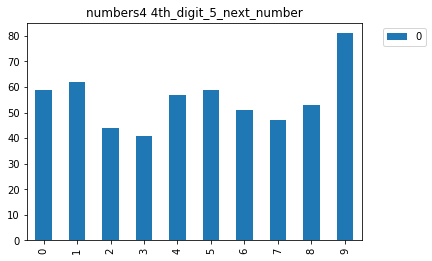

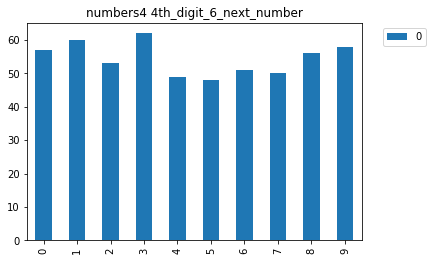

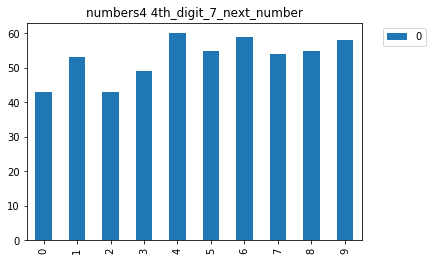

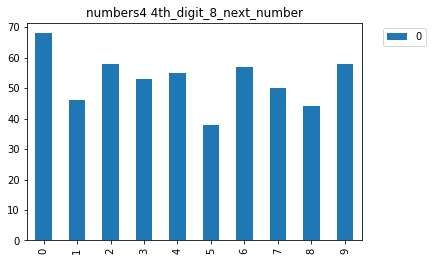

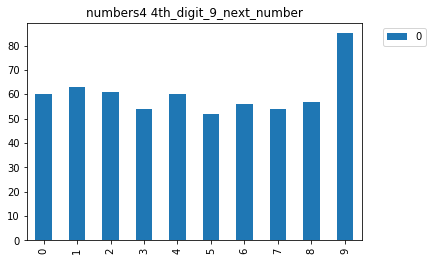

In [54]:
for i in range(10):
    graph = pd.DataFrame(next_num_count_4_4[i])
    graph.plot.bar()
    plt.title(f'numbers4 4th_digit_{i}_next_number')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')